# PROJETO DE QUIMIOMETRIA
## Classificação e Análise Multivariada de Vinhos Portugueses "Vinho Verde"
### Aplicação de Técnicas de Reconhecimento de Padrões e Calibração Multivariada

**Disciplina:** Quimiometria  
**Aluno(a)/Matrícula:** Lucas Fernandes Aguiar - 242115910
**Data/Local:** 05 de dezembro de 2025, Brasília/DF

# 1. INTRODUÇÃO

A indústria vinícola enfrenta o desafio constante de avaliar e garantir a qualidade de seus 
produtos. Tradicionalmente, a avaliação da qualidade do vinho depende de análises sensoriais 
realizadas por especialistas (sommeliers), um processo subjetivo, demorado e custoso. 
Alternativamente, análises físico-químicas podem fornecer informações objetivas sobre a 
composição do vinho, mas a interpretação dessas múltiplas variáveis simultaneamente 
requer ferramentas estatísticas avançadas.

A quimiometria oferece um conjunto de técnicas matemáticas e estatísticas que permitem 
extrair informações relevantes de dados químicos multivariados. Entre essas técnicas, 
destacam-se a Análise de Componentes Principais (PCA) para exploração de dados, 
a Análise Hierárquica de Agrupamentos (HCA) para identificação de padrões naturais, 
e métodos de classificação supervisionada como KNN e PLS-DA para predição de classes.

O presente estudo utiliza o dataset "Wine Quality" do repositório UCI Machine Learning, 
contendo dados físico-químicos de vinhos portugueses da região de "Vinho Verde". 
Este conjunto de dados inclui 11 variáveis físico-químicas e uma variável de qualidade 
determinada sensorialmente. 

## 1.1 Amostragem e coleta de dados

O estudo considerou amostras de vinho verde (tinto e branco), um produto exclusivo da região do Minho, em Portugal. Os dados foram coletados de maio de 2004 a fevereiro de 2007. A coleta se restringiu a amostras com Denominação de Origem Protegida (DOP) que foram testadas na entidade oficial de certificação (CVRVV).

Tamanho e Tipo de Conjunto de Dados: Foi considerado um grande conjunto de dados em comparação com estudos anteriores neste domínio, totalizando 4.898 amostras de vinho branco e 1.599 amostras de vinho tinto.

Apenas os testes físico-químicos mais comuns, disponíveis na fase de certificação, foram selecionados. Esses testes incluíam 11 atributos mensuráveis, como densidade, álcool, pH, acidez fixa, acidez volátil, ácido cítrico, açúcar residual, cloretos, dióxido de enxofre livre, dióxido de enxofre total e sulfatos.

As preferências sensoriais foram modeladas em uma abordagem de regressão que preserva a ordem das notas. Cada amostra foi avaliada por um mínimo de três avaliadores sensoriais (em degustações cegas). O vinho foi classificado numa escala de 0 (muito ruim) a 10 (excelente). A pontuação sensorial final utilizada no estudo foi dada pela mediana dessas avaliações.


## Objetivo

O objetivo deste projeto é aplicar técnicas quimiométricas de reconhecimento de padrões 
e classificação para:

1. Explorar a estrutura dos dados através de PCA e HCA
2. Identificar as variáveis físico-químicas mais relevantes para a qualidade do vinho
3. Desenvolver modelos de classificação (KNN, PLS-DA) para discriminar vinhos de 
   diferentes qualidades e/ou tipos (tinto vs. branco)
4. Avaliar o desempenho dos modelos através de validação adequada

# 2. MATERIAIS E MÉTODOS

## 2.1 Instalação de Bibliotecas Necessárias

A instalação das bibliotecas necessárias:

```
$ pip install pandas numpy matplotlib seaborn scikit-learn scipy ucimlrepo
```

%% [markdown]
## 2.2 Importação das Bibliotecas


In [77]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para quimiometria
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, ConfusionMatrixDisplay)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Configurações de visualização
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2.3 Carregamento dos Dados

In [78]:
# Método 1: Usando ucimlrepo (recomendado)
try:
    from ucimlrepo import fetch_ucirepo
    wine_quality = fetch_ucirepo(id=186)
    X = wine_quality.data.features
    y = wine_quality.data.targets
    print("Dados carregados via ucimlrepo")
    print(f"\nMetadados:\n{wine_quality.metadata['name']}")
except:
    print("Usando método alternativo...")

# %%
# Método 2: Carregamento direto via URL (alternativo)
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Carregar datasets
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Adicionar coluna de tipo de vinho
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

# Combinar datasets
df = pd.concat([df_red, df_white], ignore_index=True)

print(f"Dataset de vinho tinto: {df_red.shape}")
print(f"Dataset de vinho branco: {df_white.shape}")
print(f"Dataset combinado: {df.shape}")

# %%
# Visualizar primeiras linhas
df.head(10)

# %%
# Informações do dataset
df.info()

# %%
# Estatísticas descritivas
df.describe().round(3)


Dados carregados via ucimlrepo

Metadados:
Wine Quality
Dataset de vinho tinto: (1599, 13)
Dataset de vinho branco: (4898, 13)
Dataset combinado: (6497, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type        

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       6497.000          6497.000     6497.000        6497.000   
mean           7.215             0.340        0.319           5.443   
std            1.296             0.165        0.145           4.758   
min            3.800             0.080        0.000           0.600   
25%            6.400             0.230        0.250           1.800   
50%            7.000             0.290        0.310           3.000   
75%            7.700             0.400        0.390           8.100   
max           15.900             1.580        1.660          65.800   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   6497.000             6497.000              6497.000  6497.000   
mean       0.056               30.525               115.745     0.995   
std        0.035               17.749                56.522     0.003   
min        0.009                1.000                 6.000     0.987   
25%        0.038               17.000                77.000     0.992   
50%        0.047               29.000               118.000     0.995   
75%        0.065               41.000               156.000     0.997   
max        0.611              289.000               440.000     1.039   

             pH  sulphates   alcohol   quality  
count  6497.000   6497.000  6497.000  6497.000  
mean      3.219      0.531    10.492     5.818  
std       0.161      0.149     1.193     0.873  
min       2.720      0.220     8.000     3.000  
25%       3.110      0.430     9.500     5.000  
50%       3.210      0.510    10.300     6.000  
75%       3.320      0.600    11.300     6.000  
max       4.010      2.000    14.900     9.000

## 2.4 Descrição das variáveis

% verificar essas unidades

Tabela 1. Descrição das variáveis encontradas nos conjuntos de dados e respectiva unidade 
| Variável | Descrição | Unidade |
|----------|-----------|---------|
| fixed acidity | Ácidos não voláteis (tartárico) | g/dm³ |
| volatile acidity | Ácido acético | g/dm³ |
| citric acid | Ácido cítrico | g/dm³ |
| residual sugar | Açúcar residual após fermentação | g/dm³ |
| chlorides | Cloreto de sódio | g/dm³ |
| free sulfur dioxide | SO₂ livre | mg/dm³ |
| total sulfur dioxide | SO₂ total | mg/dm³ |
| density | Densidade | g/cm³ |
| pH | pH | - |
| sulphates | Sulfato de potássio | g/dm³ |
| alcohol | Teor alcoólico | % vol |
| quality | Qualidade (avaliação sensorial) | 0-10 |
| wine_type | Tipo de vinho | tinto/branco |

## 2.5 Pré-processamento dos dados

Essa etapa consiste em verificar se existem valores ausentes, duplicatas, fazer a separação de variáveis, criação de classes simplicadas para realizar classificação, a normalização dos dados. Na fase de pré-processamento, a base de dados foi transformada para que cada linha incluísse uma amostra distinta de vinho com todos os testes realizados. Devido às diferenças significativas no sabor, a análise foi realizada separadamente para os vinhos tinto e branco. Antes de ajustar os modelos, os dados foram padronizados para média zero e desvio padrão um.


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# ================================================================
# PRÉ-PROCESSAMENTO
# ================================================================

# ----------------------------------------------------------------
# 1. VERIFICAÇÃO E TRATAMENTO DE DADOS FALTANTES
# ----------------------------------------------------------------

print("\n" + "="*60)
print("1. TRATAMENTO DE DADOS FALTANTES")
print("="*60)

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal de valores ausentes: {missing_values.sum()}")

# Separar features e targets antes do tratamento
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

X = df[feature_columns].copy()
y_quality = df['quality'].copy()
y_type = df['wine_type'].copy()

# Tratamento de dados faltantes nas features
# Usando imputação pela média para variáveis numéricas
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=feature_columns,
    index=X.index
)

print(f"\nDados após imputação:")
print(f"Valores faltantes remanescentes: {X_imputed.isnull().sum().sum()}")

# Verificar duplicatas
duplicatas = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicatas}")

# Remover duplicatas se existirem
if duplicatas > 0:
    indices_unicos = ~df.duplicated()
    X_imputed = X_imputed[indices_unicos]
    y_quality = y_quality[indices_unicos]
    y_type = y_type[indices_unicos]
    print(f"Duplicatas removidas. Novo shape: {X_imputed.shape}")

# Converter para numpy array
X = X_imputed.values

# ----------------------------------------------------------------
# 2. CENTRAR NA MÉDIA
# ----------------------------------------------------------------

print("\n" + "="*60)
print("2. CENTRAMENTO NA MÉDIA")
print("="*60)

# Calcular média de cada feature
X_mean = X.mean(axis=0)
print(f"\nMédias originais das features:")
for i, col in enumerate(feature_columns):
    print(f"  {col}: {X_mean[i]:.4f}")

# Centrar os dados (subtrair a média)
X_centered = X - X_mean

print(f"\nMédias após centramento:")
X_centered_mean = X_centered.mean(axis=0)
for i, col in enumerate(feature_columns):
    print(f"  {col}: {X_centered_mean[i]:.10f}")

# ----------------------------------------------------------------
# 3. AUTOESCALAMENTO (STANDARDIZAÇÃO)
# ----------------------------------------------------------------

print("\n" + "="*60)
print("3. AUTOESCALAMENTO (Padronização)")
print("="*60)

# Aplicar StandardScaler (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDados autoescalados (média ≈ 0, desvio padrão ≈ 1)")
print(f"\nMédias após autoescalamento:")
scaled_means = X_scaled.mean(axis=0)
for i, col in enumerate(feature_columns):
    print(f"  {col}: {scaled_means[i]:.10f}")

print(f"\nDesvios padrão após autoescalamento:")
scaled_stds = X_scaled.std(axis=0)
for i, col in enumerate(feature_columns):
    print(f"  {col}: {scaled_stds[i]:.4f}")

# ----------------------------------------------------------------
# 4. NORMALIZAÇÃO (Min-Max Scaling)
# ----------------------------------------------------------------

print("\n" + "="*60)
print("4. NORMALIZAÇÃO (Escala 0-1)")
print("="*60)

from sklearn.preprocessing import MinMaxScaler

# Aplicar Min-Max Scaling (valores entre 0 e 1)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

print(f"\nDados normalizados (escala 0-1)")
print(f"\nValores mínimos após normalização:")
normalized_mins = X_normalized.min(axis=0)
for i, col in enumerate(feature_columns):
    print(f"  {col}: {normalized_mins[i]:.4f}")

print(f"\nValores máximos após normalização:")
normalized_maxs = X_normalized.max(axis=0)
for i, col in enumerate(feature_columns):
    print(f"  {col}: {normalized_maxs[i]:.4f}")

# ----------------------------------------------------------------
# 5. PREPARAÇÃO DAS VARIÁVEIS TARGET
# ----------------------------------------------------------------

print("\n" + "="*60)
print("5. PREPARAÇÃO DAS VARIÁVEIS TARGET")
print("="*60)

# Codificar tipo de vinho
le = LabelEncoder()
y_type_encoded = le.fit_transform(y_type.values)  # 0 = red, 1 = white

# Criar classes de qualidade simplificadas
def classify_quality(q):
    if q <= 5:
        return 'Baixa'
    elif q <= 6:
        return 'Média'
    else:
        return 'Alta'

y_quality_class = np.array([classify_quality(q) for q in y_quality.values])

print(f"\nMatriz X original: {X.shape}")
print(f"Matriz X centrada: {X_centered.shape}")
print(f"Matriz X autoescalada: {X_scaled.shape}")
print(f"Matriz X normalizada: {X_normalized.shape}")
print(f"\nClasses de qualidade (numérica): {np.unique(y_quality.values)}")
print(f"Tipos de vinho: {le.classes_}")

print(f"\nDistribuição das classes de qualidade simplificadas:")
print(pd.Series(y_quality_class).value_counts())

# ----------------------------------------------------------------
# RESUMO FINAL
# ----------------------------------------------------------------

print("\n" + "="*60)
print("RESUMO DO PRÉ-PROCESSAMENTO")
print("="*60)

print(f"""
Dados disponíveis para análise:

1. X (original):           shape = {X.shape}
2. X_centered:            shape = {X_centered.shape} (média = 0)
3. X_scaled:              shape = {X_scaled.shape} (média = 0, std = 1)
4. X_normalized:          shape = {X_normalized.shape} (min = 0, max = 1)

Variáveis target:
- y_quality:              Qualidade numérica (3-9)
- y_quality_class:        Qualidade categórica (Baixa/Média/Alta)
- y_type_encoded:         Tipo de vinho (0=red, 1=white)

Pré-processamentos aplicados:
✓ Tratamento de dados faltantes (imputação pela média)
✓ Remoção de duplicatas
✓ Centramento na média
✓ Autoescalamento (StandardScaler)
✓ Normalização (MinMaxScaler)
✓ Codificação de variáveis categóricas
""")


1. TRATAMENTO DE DADOS FALTANTES

Valores ausentes por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Total de valores ausentes: 0

Dados após imputação:
Valores faltantes remanescentes: 0

Número de linhas duplicadas: 1177
Duplicatas removidas. Novo shape: (5320, 11)

2. CENTRAMENTO NA MÉDIA

Médias originais das features:
  fixed acidity: 7.2152
  volatile acidity: 0.3441
  citric acid: 0.3185
  residual sugar: 5.0485
  chlorides: 0.0567
  free sulfur dioxide: 30.0367
  total sulfur dioxide: 114.1090
  density: 0.9945
  pH: 3.2247
  sulphates: 0.5334
  alcohol: 10.5492

Médias após centramento:
  fixed acidity: 0.0000000000
  volatile acidity: -0.0000000000
  citric acid: 0.0

# 3. RESULTADOS E DISCUSSÃO

## 3.1 Análise exploratória dos dados

Com os dados pré-processados, podemos iniciar a exploração dos dados a fim de buscar identificar padrões.

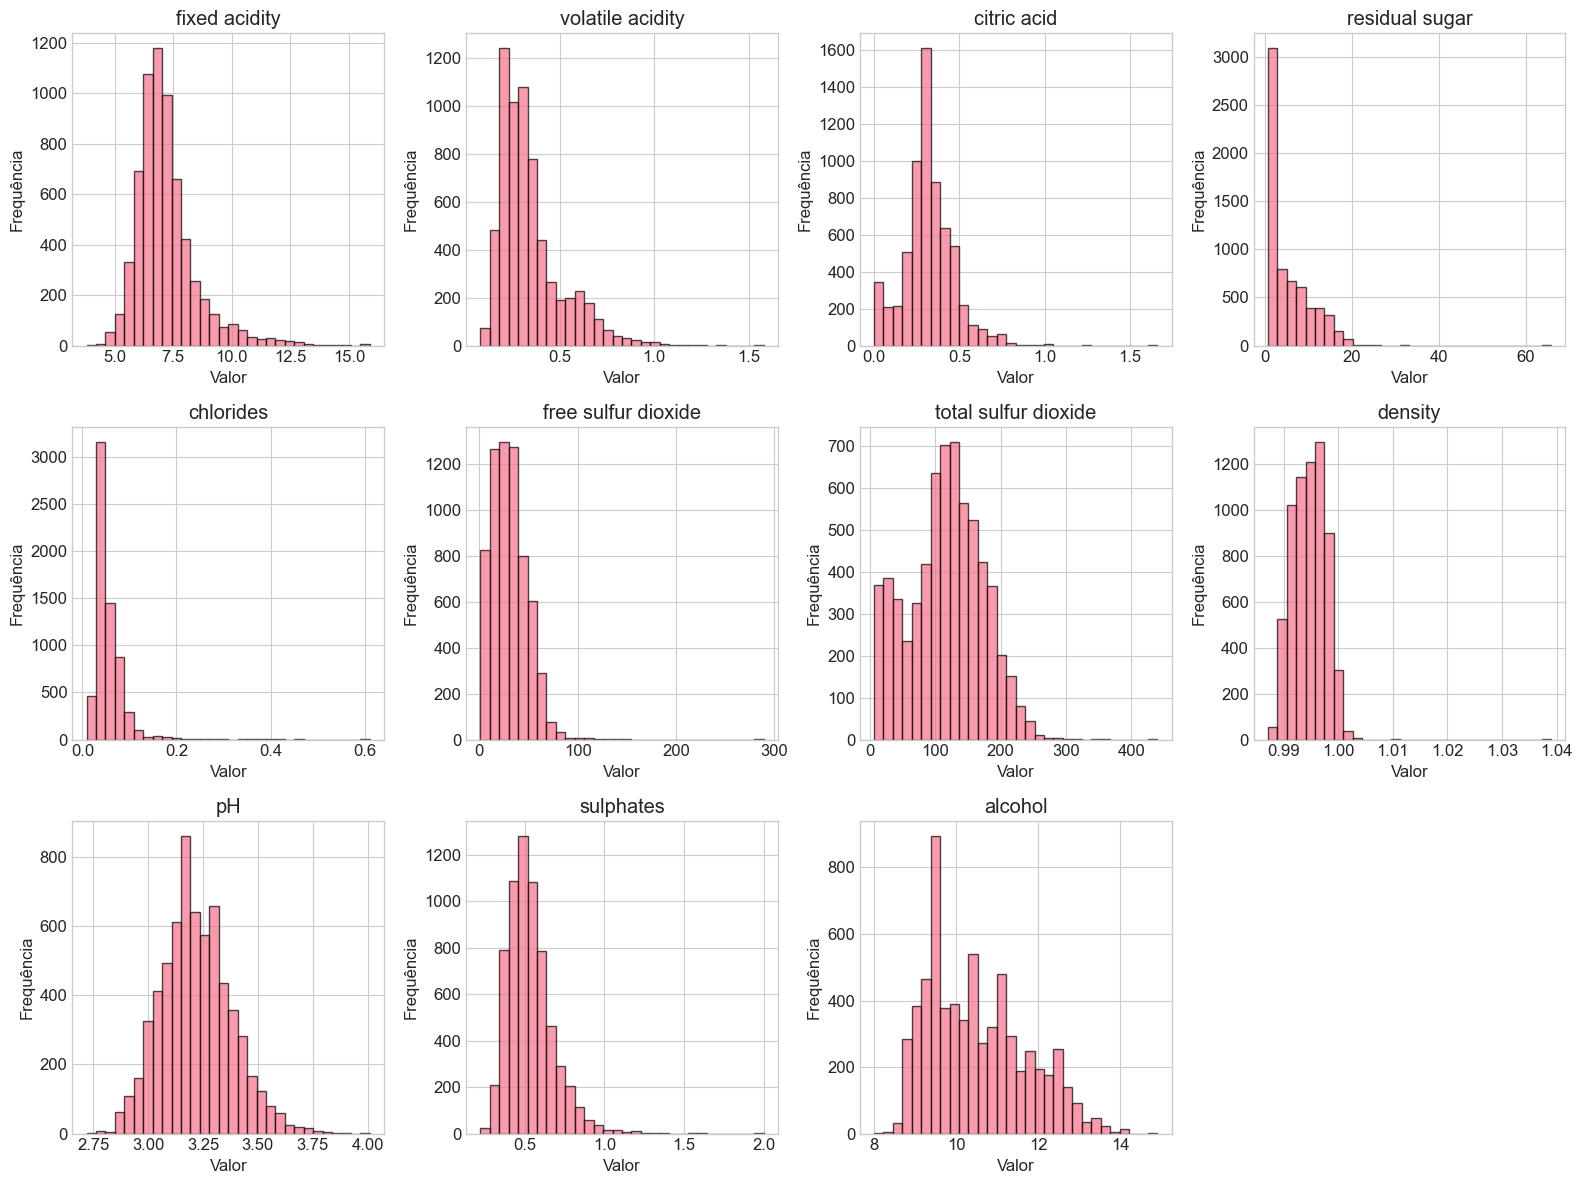

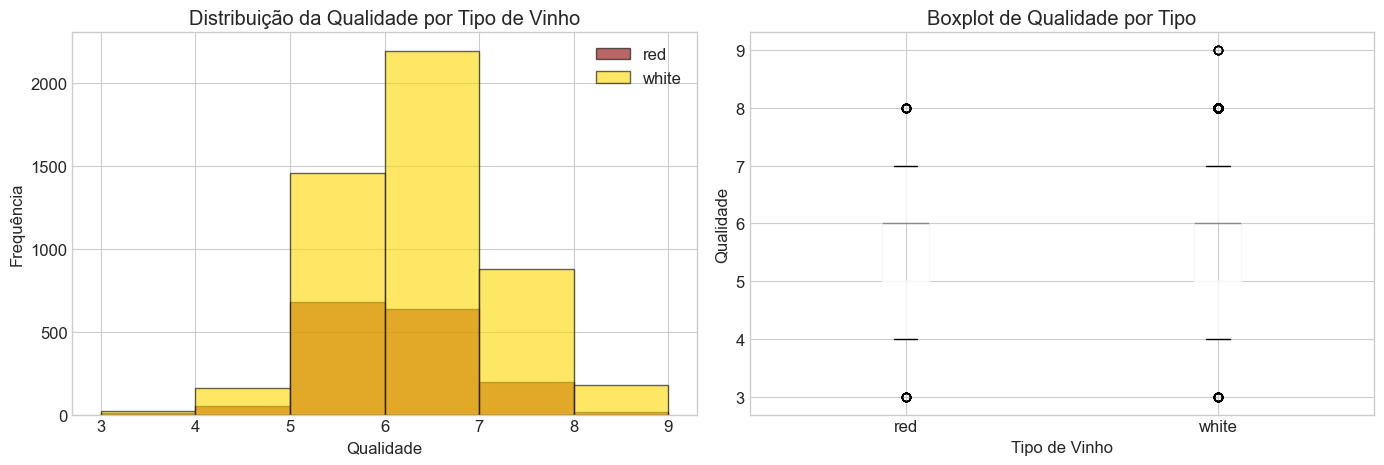

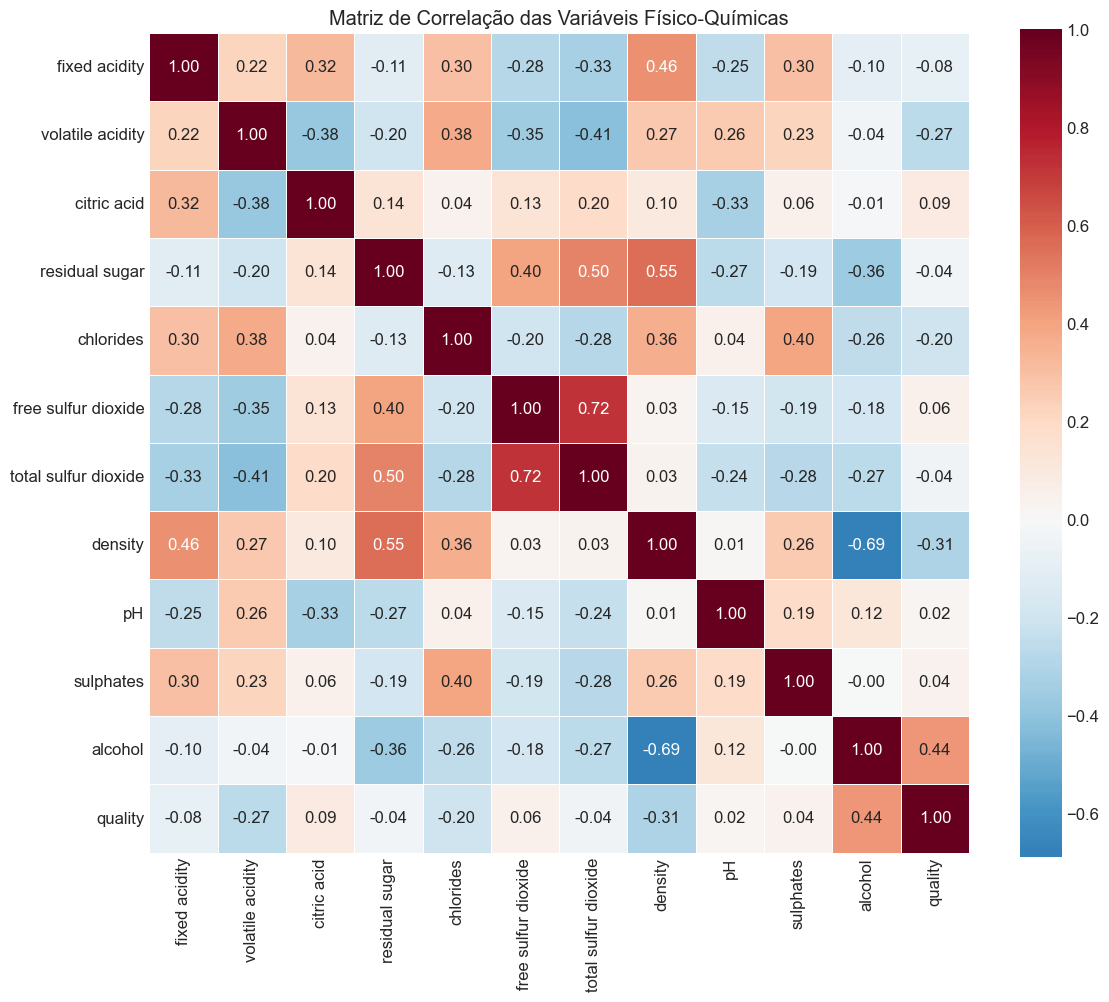

Correlação das variáveis com a qualidade:
alcohol                 0.444
citric acid             0.086
free sulfur dioxide     0.055
sulphates               0.038
pH                      0.020
residual sugar         -0.037
total sulfur dioxide   -0.041
fixed acidity          -0.077
chlorides              -0.201
volatile acidity       -0.266
density                -0.306
Name: quality, dtype: float64


In [80]:
# Distribuição das variáveis
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frequência')

# Remover subplot vazio
axes[-1].axis('off')
plt.tight_layout()
plt.savefig('distribuicao_variaveis.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Distribuição da qualidade por tipo de vinho
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
for wine_t, color in [('red', 'darkred'), ('white', 'gold')]:
    subset = df[df['wine_type'] == wine_t]['quality']
    axes[0].hist(subset, bins=range(3, 10), alpha=0.6, label=wine_t, 
                 color=color, edgecolor='black')
axes[0].set_xlabel('Qualidade')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição da Qualidade por Tipo de Vinho')
axes[0].legend()

# Boxplot
df.boxplot(column='quality', by='wine_type', ax=axes[1])
axes[1].set_xlabel('Tipo de Vinho')
axes[1].set_ylabel('Qualidade')
axes[1].set_title('Boxplot de Qualidade por Tipo')
plt.suptitle('')

plt.tight_layout()
plt.savefig('qualidade_por_tipo.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Matriz de correlação
correlation_matrix = df[feature_columns + ['quality']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Físico-Químicas')
plt.tight_layout()
plt.savefig('matriz_correlacao.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Correlações com qualidade
print("Correlação das variáveis com a qualidade:")
corr_quality = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)
print(corr_quality.round(3))


De acordo com os dados, a figura que mostra uma matriz de correlação é capaz de demonstra que não existem um único fator que tenha preponderância para a resposta de qualidade, sendo o mais elevado o teor alcóolico com a correlação positiva de 0,44.

## 3.2 Aplicação da Análise de componentes principais (PCA)

% inserir parágrafo introdutório sobre a teoria 



ALGORITMO NIPALS - Cálculo de PCA
Dimensões dos dados: 5320 amostras x 11 variáveis
Número máximo de componentes: 10
Tolerância de convergência: 1e-06
Variância total dos dados: 11.0021
----------------------------------------------------------------------
PC1: 44 iterações, resíduo = 7.80e-07, autovalor (λ) = 2.9889 ✓
PC2: 23 iterações, resíduo = 4.82e-07, autovalor (λ) = 2.4757 ✓
PC3: 19 iterações, resíduo = 5.83e-07, autovalor (λ) = 1.5876 ✓
PC4: 34 iterações, resíduo = 6.08e-07, autovalor (λ) = 0.9536 ✓
PC5: 28 iterações, resíduo = 5.35e-07, autovalor (λ) = 0.7424 ✓
PC6: 43 iterações, resíduo = 8.82e-07, autovalor (λ) = 0.6272 ✓
PC7: 262 iterações, resíduo = 9.75e-07, autovalor (λ) = 0.5211 ✓
PC8: 24 iterações, resíduo = 8.40e-07, autovalor (λ) = 0.5077 ✓
PC9: 26 iterações, resíduo = 5.03e-07, autovalor (λ) = 0.3368 ✓
PC10: 4 iterações, resíduo = 4.48e-07, autovalor (λ) = 0.2260 ✓
----------------------------------------------------------------------
Soma dos autovalores: 10.9670
V

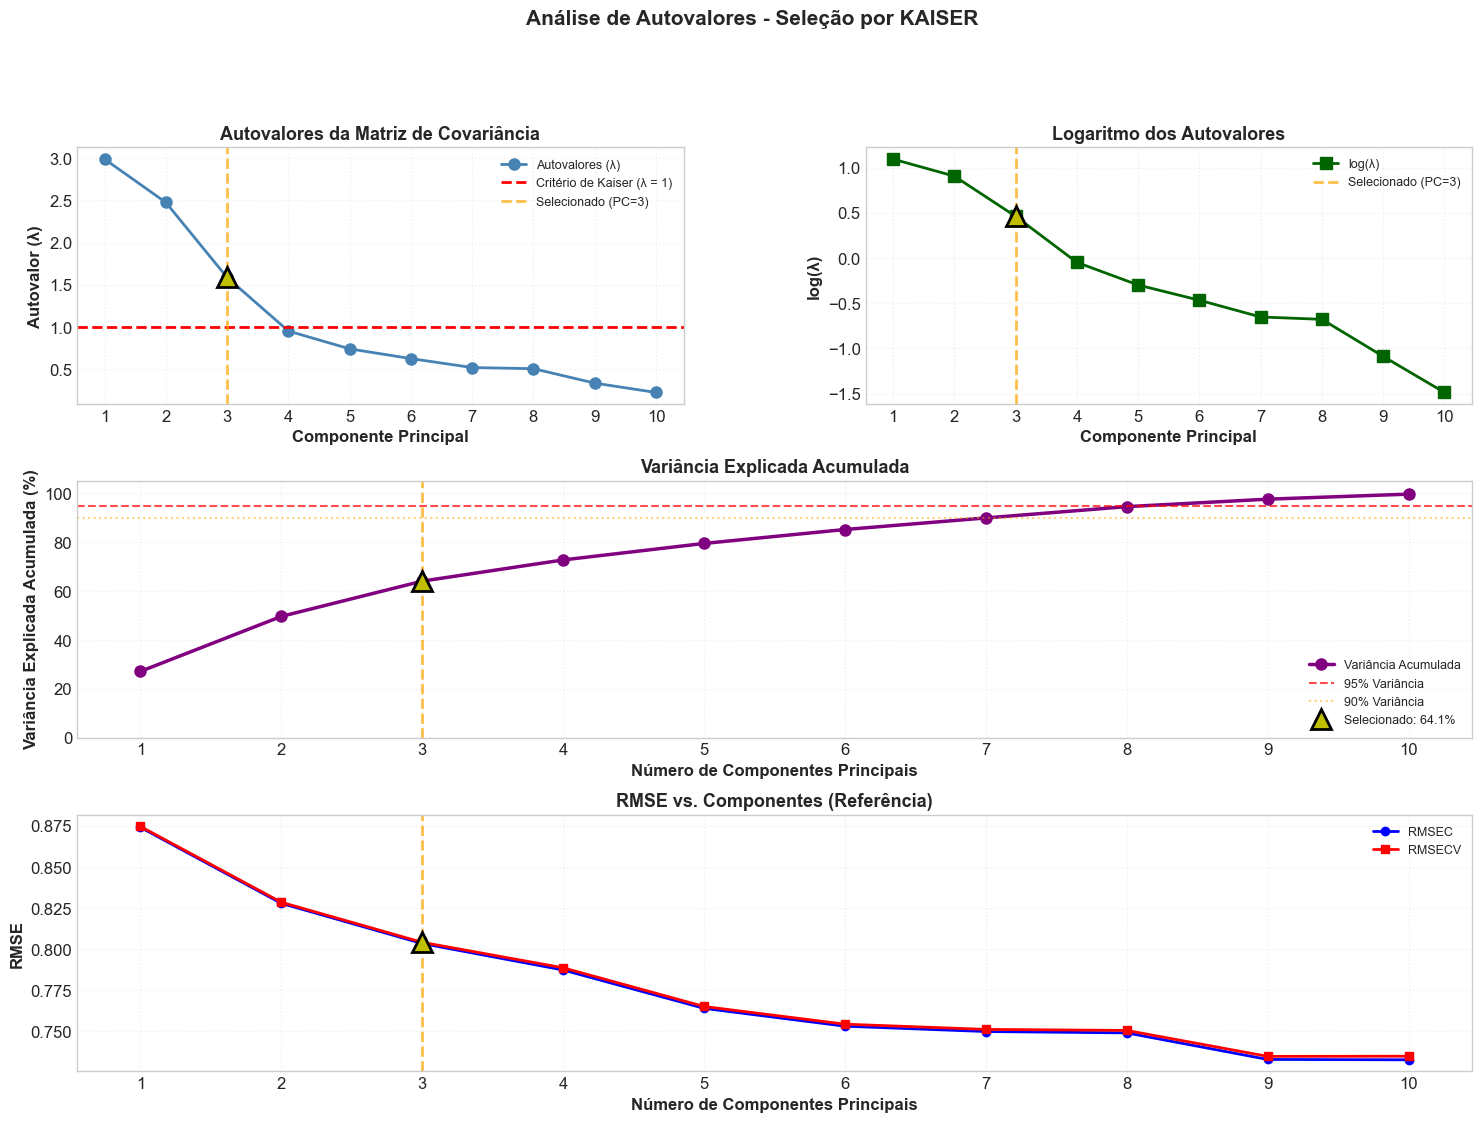


DIAGNÓSTICO DE OUTLIERS - CÁLCULOS DETALHADOS
Componentes usados: 3/10
Amostras: 5320, Features: 11

Leverage (h):
  Limite: 0.0017
  Outliers: 209 (3.93%)
  Valores - Min: 0.0000, Média: 0.0006, Max: 0.0176

T² de Hotelling:
  Limite: 7.8147
  Outliers: 291 (5.47%)

Resíduo Q:
  Limite: 9.487980
  Outliers: 266 (5.00%)


OUTLIERS DETECTADOS
  Por Leverage (h): 209
  Por T²: 291
  Por Q: 266
  Total (h ou T² ou Q): 487



In [89]:
# =============================================================================
# IMPLEMENTAÇÃO DO ALGORITMO NIPALS PARA PCA - WINE QUALITY DATASET
# Versão com Seleção por Autovalores da Matriz X Autoescalada
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from scipy import stats


# =============================================================================
# IMPLEMENTAÇÃO DO ALGORITMO NIPALS
# =============================================================================

def nipals_pca(X, n_components=None, tol=1e-6, max_iter=500):
    """
    Implementação do algoritmo NIPALS para PCA.
    
    Parâmetros:
    -----------
    X : array-like
        Matriz de dados centrada/escalada (n_samples, n_features)
    n_components : int ou None
        Número máximo de componentes a calcular. Se None, usa n_features-1
    tol : float
        Tolerância para convergência
    max_iter : int
        Número máximo de iterações por componente
    
    Retorna:
    --------
    T : array - Scores (n_samples, n_components)
    P : array - Loadings (n_features, n_components)
    eigenvalues : array - Autovalores da matriz de covariância de X
    var_explained : array - Variância explicada por componente
    convergence_info : dict - Informações de convergência
    """
    
    n_samples, n_features = X.shape
    
    # Número máximo de componentes
    if n_components is None:
        max_components = min(n_samples, n_features) - 1
    else:
        max_components = min(n_components, n_features - 1, n_samples - 1)
    
    # Inicialização
    Xc = X.copy()
    T = np.zeros((n_samples, max_components))
    P = np.zeros((n_features, max_components))
    eigenvalues = np.zeros(max_components)
    convergence_info = {'iterations': [], 'residuals': []}
    
    # Calcular variância total dos dados originais para referência
    var_total_original = np.sum(np.var(X, axis=0, ddof=1))
    
    print("="*70)
    print("ALGORITMO NIPALS - Cálculo de PCA")
    print("="*70)
    print(f"Dimensões dos dados: {n_samples} amostras x {n_features} variáveis")
    print(f"Número máximo de componentes: {max_components}")
    print(f"Tolerância de convergência: {tol}")
    print(f"Variância total dos dados: {var_total_original:.4f}")
    print("-"*70)
    
    # Loop NIPALS para cada componente
    for i in range(max_components):
        # Inicialização: usar a coluna com maior variância
        col_var = np.var(Xc, axis=0)
        t = Xc[:, np.argmax(col_var)].copy()
        
        n_iter = 0
        converged = False
        
        while n_iter < max_iter:
            # Cálculo de pesos (loadings)
            p = (Xc.T @ t) / (t.T @ t)
            # Normalização de pesos
            p = p / np.linalg.norm(p)
            # Cálculo de novos escores
            t_new = (Xc @ p) / (p.T @ p)
            
            # Verificar convergência
            residuo = np.sum((t_new - t) ** 2)
            
            if residuo < tol:
                converged = True
                break
            
            t = t_new
            n_iter += 1
        
        # Armazenar resultados
        T[:, i] = t_new
        P[:, i] = p
        
        # Autovalor = variância do score (corresponde ao autovalor da matriz de covariância)
        eigenvalues[i] = np.var(t_new, ddof=1)
        
        convergence_info['iterations'].append(n_iter)
        convergence_info['residuals'].append(residuo)
        
        # Deflação: remover a variância explicada por este componente
        Xc = Xc - np.outer(t_new, p)
        
        # Status de convergência
        status = "✓" if converged else "✗"
        print(f"PC{i+1}: {n_iter} iterações, resíduo = {residuo:.2e}, "
              f"autovalor (λ) = {eigenvalues[i]:.4f} {status}")
    
    # Calcular variância explicada como proporção da variância total
    var_explained = eigenvalues / var_total_original
    
    print("-"*70)
    print(f"Soma dos autovalores: {np.sum(eigenvalues):.4f}")
    print(f"Variância total original: {var_total_original:.4f}")
    print(f"Variância total explicada: {np.sum(var_explained)*100:.2f}%")
    
    return T, P, eigenvalues, var_explained, convergence_info


def selecionar_componentes_por_autovalor(eigenvalues, metodo='kaiser', 
                                         threshold_var=0.95, threshold_log_ratio=0.1):
    """
    Seleciona número de componentes principais baseado nos autovalores.
    
    Parâmetros:
    -----------
    eigenvalues : array
        Autovalores da matriz de covariância
    metodo : str
        Método de seleção: 'kaiser' (λ > 1), 'variancia' (var acum > threshold),
        'scree' (cotovelo no gráfico), 'log_drop' (queda no log dos autovalores)
    threshold_var : float
        Limiar de variância acumulada (padrão: 0.95 = 95%)
    threshold_log_ratio : float
        Limiar para queda relativa em log(λ) (padrão: 0.1)
    
    Retorna:
    --------
    n_components : int
        Número de componentes selecionados
    criterio_info : dict
        Informações sobre o critério usado
    """
    
    n_total = len(eigenvalues)
    var_total = np.sum(eigenvalues)
    var_explained = eigenvalues / var_total
    var_cumulative = np.cumsum(var_explained)
    
    print("\n" + "="*70)
    print("SELEÇÃO DE COMPONENTES BASEADA EM AUTOVALORES")
    print("="*70)
    print(f"Método: {metodo.upper()}")
    print("-"*70)
    
    criterio_info = {'metodo': metodo}
    
    # ==========================================================================
    # MÉTODO 1: CRITÉRIO DE KAISER (λ > 1)
    # ==========================================================================
    if metodo == 'kaiser':
        # Para dados autoescalados, mantém componentes com autovalor > 1
        n_components = np.sum(eigenvalues > 1.0)
        
        if n_components == 0:
            n_components = 1  # Mínimo 1 componente
            print("⚠️  Nenhum autovalor > 1.0, selecionando 1 componente")
        
        print(f"Autovalores > 1.0: {n_components}")
        print(f"Variância explicada: {var_cumulative[n_components-1]*100:.2f}%")
        
        criterio_info.update({
            'n_components': n_components,
            'var_explicada': var_cumulative[n_components-1],
            'autovalores_selecionados': eigenvalues[:n_components]
        })
    
    # ==========================================================================
    # MÉTODO 2: VARIÂNCIA ACUMULADA
    # ==========================================================================
    elif metodo == 'variancia':
        n_components = np.argmax(var_cumulative >= threshold_var) + 1
        
        if n_components == 0:
            n_components = n_total
        
        print(f"Componentes para {threshold_var*100:.0f}% variância: {n_components}")
        print(f"Variância explicada real: {var_cumulative[n_components-1]*100:.2f}%")
        
        criterio_info.update({
            'n_components': n_components,
            'threshold': threshold_var,
            'var_explicada': var_cumulative[n_components-1]
        })
    
    # ==========================================================================
    # MÉTODO 3: SCREE PLOT (Queda Relativa de Autovalores)
    # ==========================================================================
    elif metodo == 'scree':
        # Calcular diferenças entre autovalores consecutivos
        eigenvalue_drops = -np.diff(eigenvalues)
        
        # Calcular quedas relativas
        relative_drops = np.zeros(len(eigenvalue_drops) - 1)
        for i in range(len(relative_drops)):
            if abs(eigenvalue_drops[i]) > 1e-10:
                relative_drops[i] = eigenvalue_drops[i+1] / eigenvalue_drops[i]
            else:
                relative_drops[i] = 1.0
        
        # Encontrar o "cotovelo" (onde a queda diminui significativamente)
        n_components = 1
        for i in range(len(relative_drops)):
            if relative_drops[i] < 0.3:  # Queda < 30% da anterior
                n_components = i + 2
                break
        else:
            # Se não encontrar, usar maior queda absoluta
            max_drop_idx = np.argmax(eigenvalue_drops)
            n_components = max_drop_idx + 2
        
        print(f"Componentes pelo cotovelo (scree): {n_components}")
        print(f"Variância explicada: {var_cumulative[n_components-1]*100:.2f}%")
        
        criterio_info.update({
            'n_components': n_components,
            'var_explicada': var_cumulative[n_components-1],
            'quedas': eigenvalue_drops,
            'quedas_relativas': relative_drops
        })
    
    # ==========================================================================
    # MÉTODO 4: QUEDA NO LOG DOS AUTOVALORES
    # ==========================================================================
    elif metodo == 'log_drop':
        # Calcular log dos autovalores (evitar log(0))
        log_eigenvalues = np.log(np.maximum(eigenvalues, 1e-10))
        
        # Calcular diferenças no log
        log_drops = -np.diff(log_eigenvalues)
        
        # Calcular quedas relativas no log
        log_relative_drops = np.zeros(len(log_drops) - 1)
        for i in range(len(log_relative_drops)):
            if abs(log_drops[i]) > 1e-10:
                log_relative_drops[i] = log_drops[i+1] / log_drops[i]
            else:
                log_relative_drops[i] = 1.0
        
        # Encontrar onde a queda no log diminui significativamente
        n_components = 1
        for i in range(len(log_relative_drops)):
            if log_relative_drops[i] < threshold_log_ratio:
                n_components = i + 2
                break
        else:
            # Se não encontrar, usar maior queda no log
            max_log_drop_idx = np.argmax(log_drops)
            n_components = max_log_drop_idx + 2
        
        print(f"Componentes por queda em log(λ): {n_components}")
        print(f"Variância explicada: {var_cumulative[n_components-1]*100:.2f}%")
        print(f"Threshold de queda relativa: {threshold_log_ratio}")
        
        criterio_info.update({
            'n_components': n_components,
            'var_explicada': var_cumulative[n_components-1],
            'log_eigenvalues': log_eigenvalues,
            'log_drops': log_drops,
            'log_relative_drops': log_relative_drops,
            'threshold': threshold_log_ratio
        })
    
    else:
        raise ValueError(f"Método desconhecido: {metodo}")
    
    print("="*70)
    
    return n_components, criterio_info


def nipals_with_eigenvalue_selection(X, y=None, max_components=None, tol=1e-6,
                                     metodo_selecao='kaiser', 
                                     threshold_var=0.95,
                                     threshold_log_ratio=0.1,
                                     calcular_rmse=True, cv_folds=10):
    """
    NIPALS com seleção de componentes baseada em autovalores.
    Opcionalmente calcula RMSE para comparação.
    
    Parâmetros:
    -----------
    X : array
        Dados autoescalados
    y : array ou None
        Variável resposta (opcional, para cálculo de RMSE)
    max_components : int
        Número máximo de componentes a calcular
    tol : float
        Tolerância para convergência
    metodo_selecao : str
        'kaiser', 'variancia', 'scree', ou 'log_drop'
    threshold_var : float
        Limiar de variância acumulada (para método 'variancia')
    threshold_log_ratio : float
        Limiar para queda relativa em log(λ)
    calcular_rmse : bool
        Se True e y fornecido, calcula RMSEC/RMSECV
    cv_folds : int
        Número de folds para validação cruzada
    
    Retorna:
    --------
    T_full : Scores completos
    P_full : Loadings completos
    eigenvalues : Autovalores
    var_explained : Variância explicada
    n_selected : Número de componentes selecionados
    convergence_info : Informações de convergência
    criterio_info : Informações do critério de seleção
    results_table : DataFrame com resultados
    rmsec_values : (opcional) Valores de RMSEC
    rmsecv_values : (opcional) Valores de RMSECV
    """
    
    n_samples, n_features = X.shape
    
    if max_components is None:
        max_components = min(n_samples, n_features) - 1
    else:
        max_components = min(max_components, n_features - 1, n_samples - 1)
    
    # Calcular todos os componentes usando NIPALS
    T_full, P_full, eigenvalues, var_exp, conv_info = nipals_pca(
        X, n_components=max_components, tol=tol
    )
    
    # Selecionar componentes baseado em autovalores
    n_selected, criterio_info = selecionar_componentes_por_autovalor(
        eigenvalues, 
        metodo=metodo_selecao,
        threshold_var=threshold_var,
        threshold_log_ratio=threshold_log_ratio
    )
    
    # Calcular RMSEC e RMSECV se solicitado e y fornecido
    rmsec_values = None
    rmsecv_values = None
    
    if calcular_rmse and y is not None:
        if len(y) != n_samples:
            raise ValueError(f"Inconsistência: X tem {n_samples} amostras, y tem {len(y)}")
        
        print("\n" + "="*70)
        print("CÁLCULO DE RMSE PARA COMPARAÇÃO")
        print("="*70)
        
        rmsec_values = []
        rmsecv_values = []
        
        for n_comp in range(1, max_components + 1):
            X_subset = T_full[:, :n_comp]
            
            # RMSEC
            model = LinearRegression()
            model.fit(X_subset, y)
            y_pred_cal = model.predict(X_subset)
            rmsec = np.sqrt(np.mean((y - y_pred_cal)**2))
            
            # RMSECV
            kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
            y_pred_cv = cross_val_predict(model, X_subset, y, cv=kfold)
            rmsecv = np.sqrt(np.mean((y - y_pred_cv)**2))
            
            rmsec_values.append(rmsec)
            rmsecv_values.append(rmsecv)
            
            marcador = "✓" if n_comp == n_selected else " "
            print(f"{marcador} PC {n_comp:2d}: RMSEC = {rmsec:.4f}, RMSECV = {rmsecv:.4f}")
        
        rmsec_values = np.array(rmsec_values)
        rmsecv_values = np.array(rmsecv_values)
        
        print("-"*70)
        print(f"No ponto selecionado (PC={n_selected}):")
        print(f"  RMSEC  = {rmsec_values[n_selected-1]:.4f}")
        print(f"  RMSECV = {rmsecv_values[n_selected-1]:.4f}")
        print("="*70)
    
    # Criar tabela de resultados
    var_cumulative = np.cumsum(var_exp)
    
    results_data = {
        'PC': list(range(1, max_components + 1)),
        'Autovalor (λ)': eigenvalues,
        'log(λ)': np.log(np.maximum(eigenvalues, 1e-10)),
        '% Variância': var_exp * 100,
        '% Var. Acumulada': var_cumulative * 100
    }
    
    if rmsec_values is not None:
        results_data['RMSEC'] = rmsec_values
        results_data['RMSECV'] = rmsecv_values
    
    results_table = pd.DataFrame(results_data)
    
    # Adicionar indicador de seleção
    results_table['Selecionado'] = ''
    results_table.loc[n_selected-1, 'Selecionado'] = '✓'
    
    print("\n" + "="*100)
    print(f"TABELA DE RESULTADOS - PCA (Seleção: {metodo_selecao.upper()})")
    print("="*100)
    print(results_table.to_string(index=False))
    print("="*100)
    
    resultado = {
        'T_full': T_full,
        'P_full': P_full,
        'eigenvalues': eigenvalues,
        'var_explained': var_exp,
        'n_selected': n_selected,
        'convergence_info': conv_info,
        'criterio_info': criterio_info,
        'results_table': results_table
    }
    
    if rmsec_values is not None:
        resultado['rmsec_values'] = rmsec_values
        resultado['rmsecv_values'] = rmsecv_values
    
    return resultado


def plot_eigenvalue_analysis(eigenvalues, var_explained, n_selected, 
                             criterio_info, rmsec_values=None, rmsecv_values=None,
                             save_path='eigenvalue_analysis.png'):
    """
    Plota análise de autovalores e critério de seleção.
    """
    
    n_components_range = np.arange(1, len(eigenvalues) + 1)
    var_cumulative = np.cumsum(var_explained)
    
    # Determinar número de subplots baseado em dados disponíveis
    metodo = criterio_info['metodo']
    
    if rmsec_values is not None:
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
        
        ax1 = fig.add_subplot(gs[0, 0])  # Autovalores
        ax2 = fig.add_subplot(gs[0, 1])  # Log autovalores
        ax3 = fig.add_subplot(gs[1, :])  # Variância acumulada
        ax4 = fig.add_subplot(gs[2, :])  # RMSE
    else:
        fig = plt.figure(figsize=(16, 10))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
        
        ax1 = fig.add_subplot(gs[0, 0])  # Autovalores
        ax2 = fig.add_subplot(gs[0, 1])  # Log autovalores
        ax3 = fig.add_subplot(gs[1, :])  # Variância acumulada
        ax4 = None
    
    # ========== SUBPLOT 1: Autovalores ==========
    ax1.plot(n_components_range, eigenvalues, 'o-', color='steelblue', 
             linewidth=2, markersize=8, label='Autovalores (λ)')
    ax1.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
                label='Critério de Kaiser (λ = 1)')
    ax1.axvline(x=n_selected, color='orange', linestyle='--', linewidth=2, 
                alpha=0.7, label=f'Selecionado (PC={n_selected})')
    ax1.plot(n_selected, eigenvalues[n_selected-1], 'y^', markersize=15, 
             markeredgecolor='black', markeredgewidth=2, zorder=5)
    
    ax1.set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Autovalor (λ)', fontsize=12, fontweight='bold')
    ax1.set_title('Autovalores da Matriz de Covariância', fontsize=13, fontweight='bold')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3, linestyle=':', linewidth=1)
    ax1.set_xticks(n_components_range)
    
    # ========== SUBPLOT 2: Log dos Autovalores ==========
    log_eigenvalues = np.log(np.maximum(eigenvalues, 1e-10))
    ax2.plot(n_components_range, log_eigenvalues, 's-', color='darkgreen', 
             linewidth=2, markersize=8, label='log(λ)')
    ax2.axvline(x=n_selected, color='orange', linestyle='--', linewidth=2, 
                alpha=0.7, label=f'Selecionado (PC={n_selected})')
    ax2.plot(n_selected, log_eigenvalues[n_selected-1], 'y^', markersize=15, 
             markeredgecolor='black', markeredgewidth=2, zorder=5)
    
    ax2.set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
    ax2.set_ylabel('log(λ)', fontsize=12, fontweight='bold')
    ax2.set_title('Logaritmo dos Autovalores', fontsize=13, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3, linestyle=':', linewidth=1)
    ax2.set_xticks(n_components_range)
    
    # ========== SUBPLOT 3: Variância Acumulada ==========
    ax3.plot(n_components_range, var_cumulative * 100, 'o-', color='purple', 
             linewidth=2.5, markersize=8, label='Variância Acumulada')
    ax3.axhline(y=95, color='red', linestyle='--', linewidth=1.5, 
                alpha=0.7, label='95% Variância')
    ax3.axhline(y=90, color='orange', linestyle=':', linewidth=1.5, 
                alpha=0.5, label='90% Variância')
    ax3.axvline(x=n_selected, color='orange', linestyle='--', linewidth=2, 
                alpha=0.7)
    ax3.plot(n_selected, var_cumulative[n_selected-1] * 100, 'y^', markersize=15, 
             markeredgecolor='black', markeredgewidth=2, zorder=5,
             label=f'Selecionado: {var_cumulative[n_selected-1]*100:.1f}%')
    
    ax3.set_xlabel('Número de Componentes Principais', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Variância Explicada Acumulada (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Variância Explicada Acumulada', fontsize=13, fontweight='bold')
    ax3.legend(loc='lower right', fontsize=9)
    ax3.grid(True, alpha=0.3, linestyle=':', linewidth=1)
    ax3.set_xticks(n_components_range)
    ax3.set_ylim([0, 105])
    
    # ========== SUBPLOT 4: RMSE (se disponível) ==========
    if ax4 is not None and rmsec_values is not None:
        ax4.plot(n_components_range, rmsec_values, 'o-', color='blue', 
                 linewidth=2, markersize=6, label='RMSEC')
        ax4.plot(n_components_range, rmsecv_values, 's-', color='red', 
                 linewidth=2, markersize=6, label='RMSECV')
        ax4.axvline(x=n_selected, color='orange', linestyle='--', linewidth=2, 
                    alpha=0.7)
        ax4.plot(n_selected, rmsecv_values[n_selected-1], 'y^', markersize=15, 
                 markeredgecolor='black', markeredgewidth=2, zorder=5)
        
        ax4.set_xlabel('Número de Componentes Principais', fontsize=12, fontweight='bold')
        ax4.set_ylabel('RMSE', fontsize=12, fontweight='bold')
        ax4.set_title('RMSE vs. Componentes (Referência)', fontsize=13, fontweight='bold')
        ax4.legend(loc='best', fontsize=9)
        ax4.grid(True, alpha=0.3, linestyle=':', linewidth=1)
        ax4.set_xticks(n_components_range)
    
    plt.suptitle(f'Análise de Autovalores - Seleção por {metodo.upper()}', 
                 fontsize=15, fontweight='bold', y=0.995)
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Gráfico salvo em: {save_path}")
    plt.show() 


# =============================================================================
# DIAGNÓSTICO DE OUTLIERS (mantido igual)
# =============================================================================

def calcular_diagnosticos_pca_nipals(X_scaled, T_full, P_full, eigenvalues, n_components):
    """
    Cálculo de T², Q, leverage (h) e demais diagnósticos.
    """
    
    n_samples, n_features = X_scaled.shape
    n_total = len(eigenvalues)
    
    scores = T_full[:, :n_components]
    loadings = P_full[:, :n_components]
    eigenvalues_used = eigenvalues[:n_components]
    
    print(f"\n{'='*70}")
    print("DIAGNÓSTICO DE OUTLIERS - CÁLCULOS DETALHADOS")
    print(f"{'='*70}")
    print(f"Componentes usados: {n_components}/{n_total}")
    print(f"Amostras: {n_samples}, Features: {n_features}")
    
    # Verificar autovalores
    eigenvalues_used = np.maximum(eigenvalues_used, 1e-10)
    var_scores_real = np.var(scores, axis=0, ddof=1)
    
    # LEVERAGE (h)
    scores_centered = scores - scores.mean(axis=0)
    cov_scores = (scores_centered.T @ scores_centered) / (n_samples - 1)
    
    try:
        cov_scores_inv = np.linalg.inv(cov_scores)
        leverage = np.array([scores_centered[i] @ cov_scores_inv @ scores_centered[i] 
                            for i in range(n_samples)])
        leverage = leverage / n_samples
    except np.linalg.LinAlgError:
        cov_scores_pinv = np.linalg.pinv(cov_scores)
        leverage = np.array([scores_centered[i] @ cov_scores_pinv @ scores_centered[i] 
                            for i in range(n_samples)])
        leverage = leverage / n_samples
    
    leverage_limit = 3 * n_components / n_samples
    
    # T² DE HOTELLING
    scores_std = scores / np.sqrt(var_scores_real)
    T2_hotelling = np.sum(scores_std**2, axis=1)
    
    alpha = 0.05
    df1 = n_components
    df2 = n_samples - n_components
    
    if df2 > 0:
        chi2_crit = stats.chi2.ppf(1 - alpha, df1)
        T2_limit = chi2_crit
    else:
        T2_limit = stats.chi2.ppf(1 - alpha, n_components)
    
    # RESÍDUOS Q
    X_reconstructed = scores @ loadings.T
    residuos = X_scaled - X_reconstructed
    Q_residuos = np.sum(residuos**2, axis=1)
    
    Q_limit = np.percentile(Q_residuos, 95)
    
    # Identificar outliers
    outliers_leverage = np.where(leverage > leverage_limit)[0]
    
    print(f"\nLeverage (h):")
    print(f"  Limite: {leverage_limit:.4f}")
    print(f"  Outliers: {len(outliers_leverage)} ({len(outliers_leverage)/n_samples*100:.2f}%)")
    print(f"  Valores - Min: {leverage.min():.4f}, Média: {leverage.mean():.4f}, Max: {leverage.max():.4f}")
    
    print(f"\nT² de Hotelling:")
    print(f"  Limite: {T2_limit:.4f}")
    print(f"  Outliers: {np.sum(T2_hotelling > T2_limit)} ({np.sum(T2_hotelling > T2_limit)/n_samples*100:.2f}%)")
    
    print(f"\nResíduo Q:")
    print(f"  Limite: {Q_limit:.6f}")
    print(f"  Outliers: {np.sum(Q_residuos > Q_limit)} ({np.sum(Q_residuos > Q_limit)/n_samples*100:.2f}%)")
    
    print(f"{'='*70}\n")
    
    return leverage, T2_hotelling, Q_residuos, leverage_limit, T2_limit, Q_limit


# =============================================================================
# CÓDIGO PRINCIPAL - WINE QUALITY DATASET
# =============================================================================

# ESCOLHA DO MÉTODO DE SELEÇÃO:
# 'kaiser' - Autovalores > 1 (padrão para dados autoescalados)
# 'variancia' - Variância acumulada > threshold
# 'scree' - Cotovelo no gráfico de autovalores
# 'log_drop' - Queda no logaritmo dos autovalores

METODO_SELECAO = 'kaiser'  # ← ALTERE AQUI PARA MUDAR O CRITÉRIO

# Aplicar PCA com NIPALS usando seleção por autovalores
resultado = nipals_with_eigenvalue_selection(
    X_scaled, 
    y=y_quality,  # y fornecido para calcular RMSE comparativo
    max_components=None,
    tol=1e-6,
    metodo_selecao=METODO_SELECAO,
    threshold_var=0.95,  # Para método 'variancia'
    threshold_log_ratio=0.3,  # Para método 'log_drop'
    calcular_rmse=True,
    cv_folds=10
)

# Extrair resultados
T_full = resultado['T_full']
P_full = resultado['P_full']
eigenvalues = resultado['eigenvalues']
var_exp = resultado['var_explained']
n_comp_selecionados = resultado['n_selected']
conv_info = resultado['convergence_info']
criterio_info = resultado['criterio_info']
results_table = resultado['results_table']
rmsec_values = resultado.get('rmsec_values')
rmsecv_values = resultado.get('rmsecv_values')

n_total = len(eigenvalues)
var_cum = np.cumsum(var_exp)

print(f"\n{'='*70}")
print("RESUMO DA SELEÇÃO DE COMPONENTES - WINE QUALITY")
print(f"{'='*70}")
print(f"Método de seleção: {METODO_SELECAO.upper()}")
print(f"Número de PCs selecionados: {n_comp_selecionados}")
print(f"Autovalor no ponto ótimo: {eigenvalues[n_comp_selecionados-1]:.4f}")
print(f"Variância explicada: {var_cum[n_comp_selecionados-1]*100:.2f}%")
if rmsec_values is not None:
    print(f"RMSEC no ponto ótimo: {rmsec_values[n_comp_selecionados-1]:.4f}")
    print(f"RMSECV no ponto ótimo: {rmsecv_values[n_comp_selecionados-1]:.4f}")
print(f"{'='*70}")

# Salvar tabela em CSV
results_table.to_csv('pca_results_table.csv', index=False)
print(f"\n✓ Tabela de resultados salva em: pca_results_table.csv")

# Plot da análise de autovalores
plot_eigenvalue_analysis(
    eigenvalues, var_exp, n_comp_selecionados, criterio_info,
    rmsec_values=rmsec_values, rmsecv_values=rmsecv_values,
    save_path='wine_eigenvalue_analysis.png'
)

# Análise de outliers
leverage, T2_hotelling, Q_residuos, h_limit, T2_limit, Q_limit = calcular_diagnosticos_pca_nipals(
    X_scaled, T_full, P_full, eigenvalues, n_comp_selecionados
)

# Identificar outliers
outliers_leverage = np.where(leverage > h_limit)[0]
outliers_T2 = np.where(T2_hotelling > T2_limit)[0]
outliers_Q = np.where(Q_residuos > Q_limit)[0]
outliers_any = np.unique(np.concatenate([outliers_leverage, outliers_T2, outliers_Q]))

print(f"\n{'='*70}")
print("OUTLIERS DETECTADOS")
print(f"{'='*70}")
print(f"  Por Leverage (h): {len(outliers_leverage)}")
print(f"  Por T²: {len(outliers_T2)}")
print(f"  Por Q: {len(outliers_Q)}")
print(f"  Total (h ou T² ou Q): {len(outliers_any)}")
print(f"{'='*70}\n")

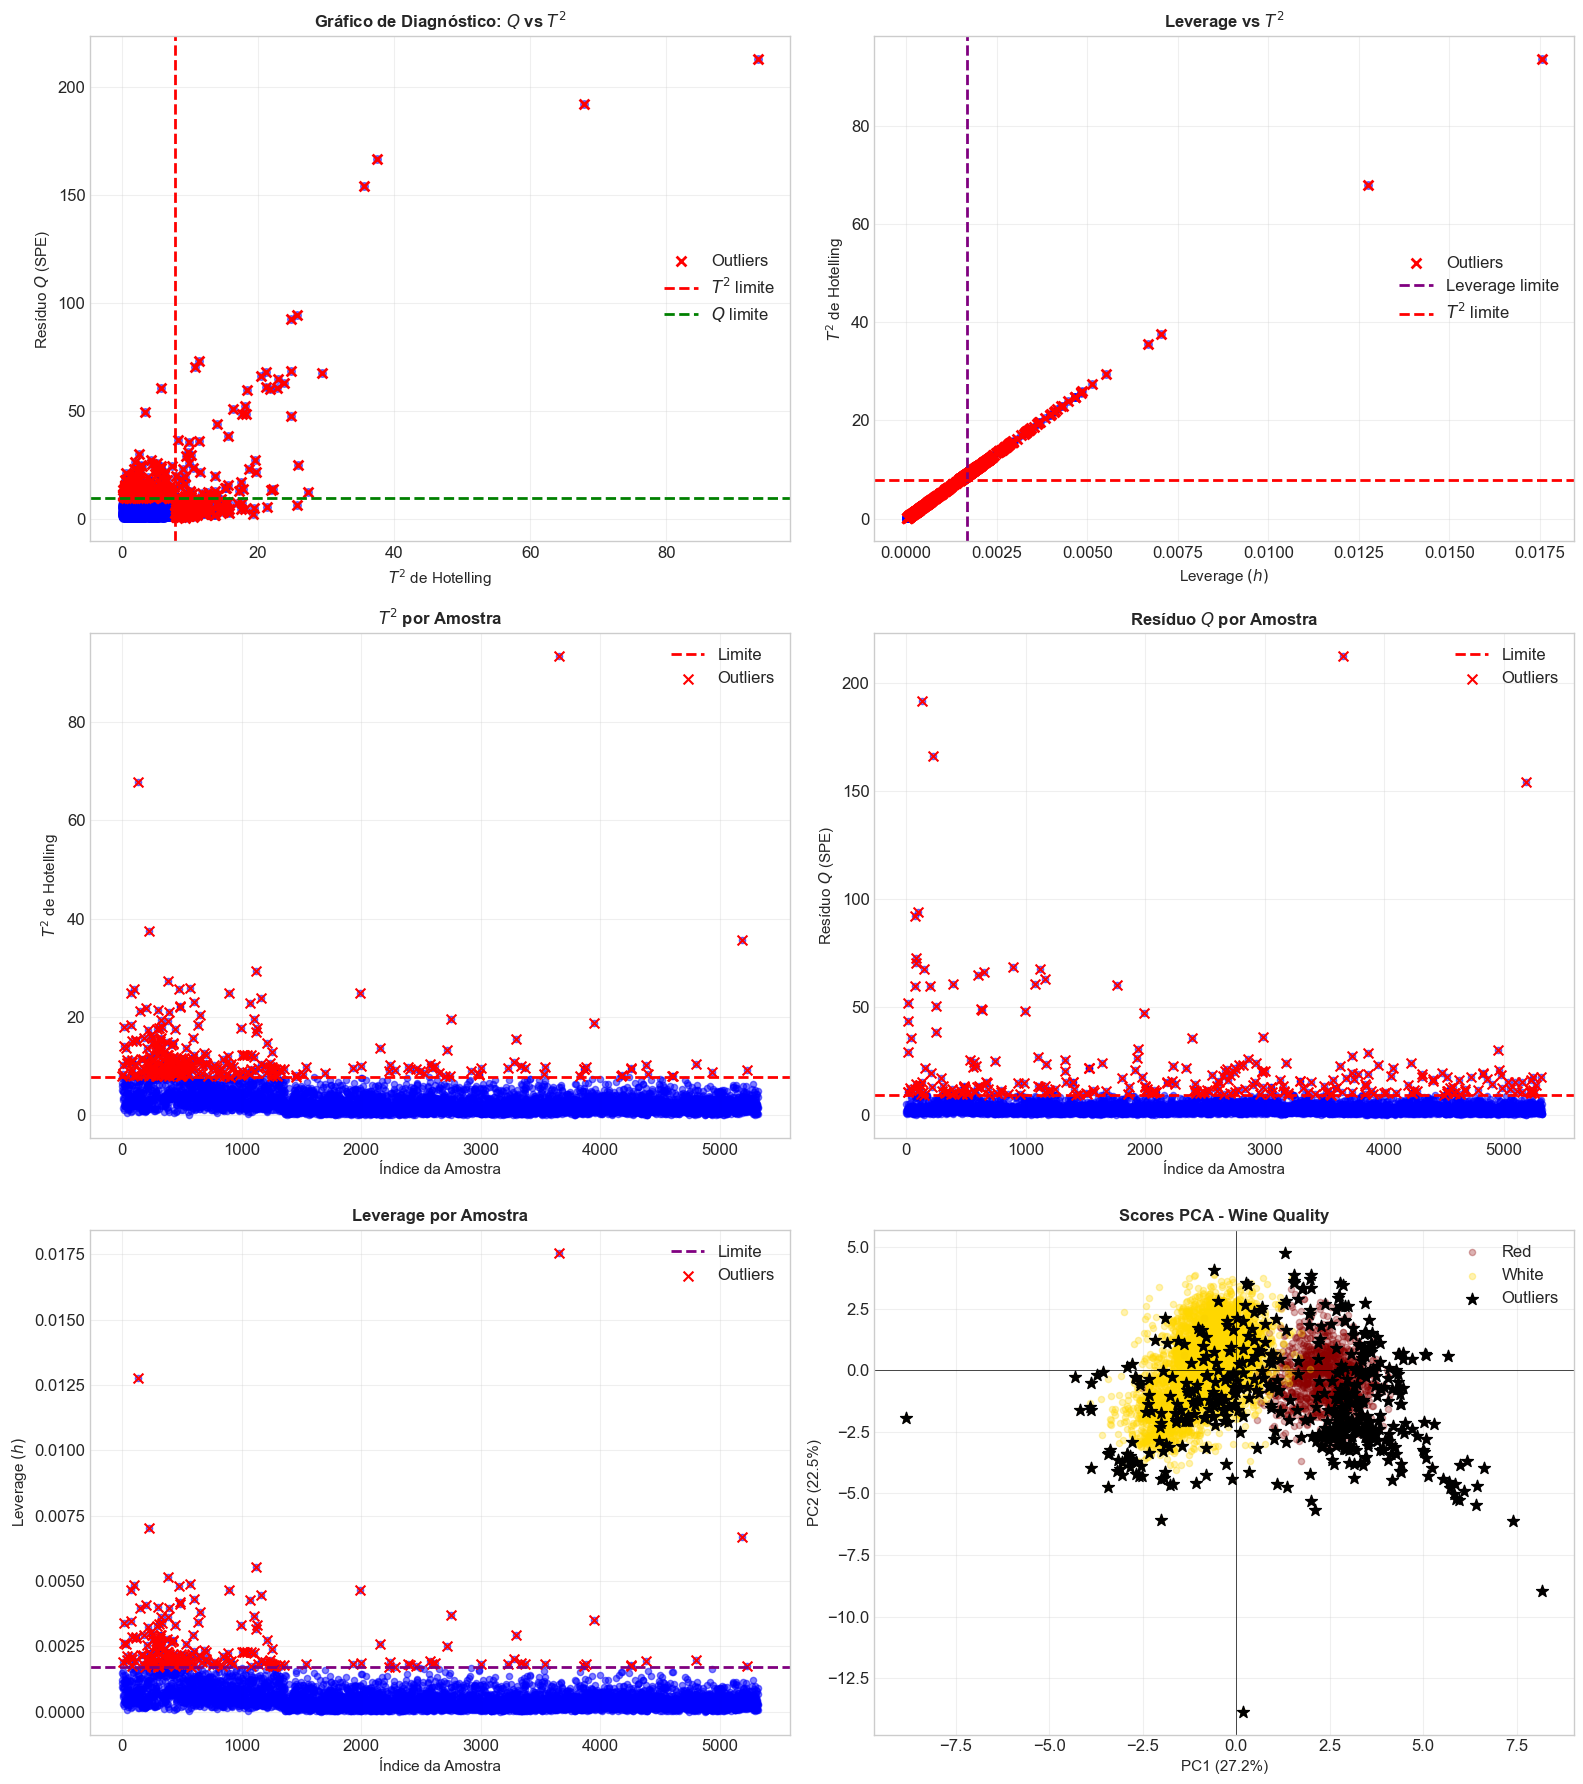

✓ Gráfico de diagnóstico completo salvo em: wine_pca_diagnostico_completo.png


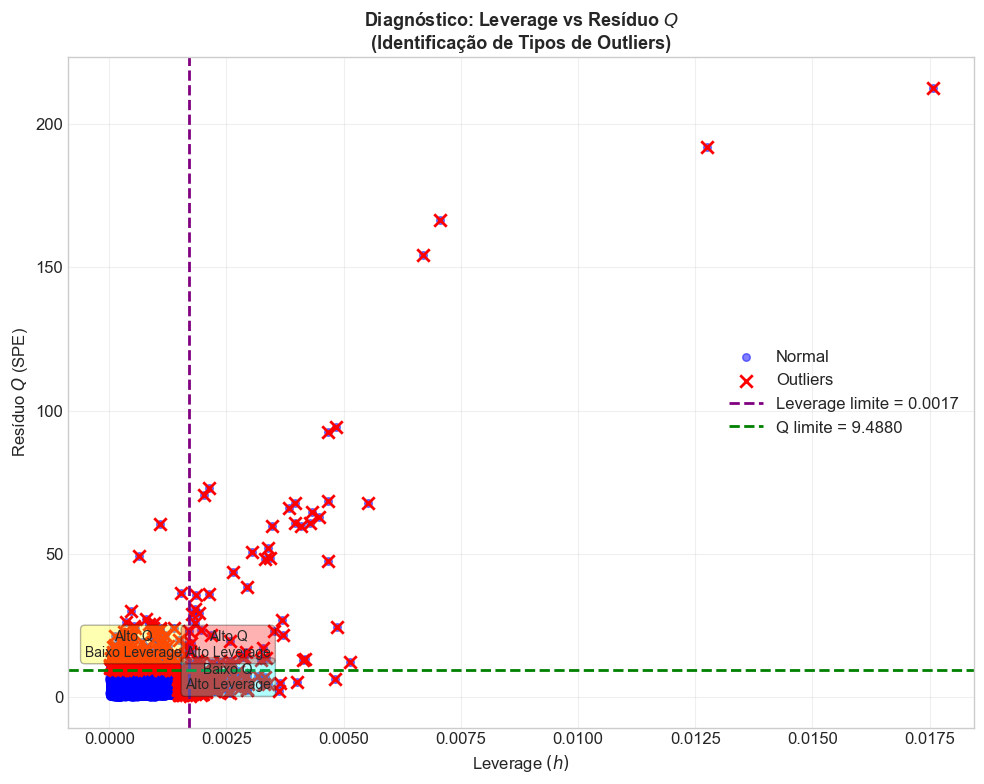

✓ Gráfico Leverage vs Q salvo em: wine_leverage_vs_q.png

RESUMO FINAL - PCA WINE QUALITY COM DIAGNÓSTICO COMPLETO
Amostras: 5320
Variáveis originais: 11
Componentes selecionados: 3
Redução de dimensionalidade: 72.7%
Variância explicada: 64.10%

Outliers detectados:
  Leverage (h > 0.0017): 209 (3.93%)
  T² (T² > 7.81): 291 (5.47%)
  Q (Q > 9.4880): 266 (5.00%)
  TOTAL (qualquer critério): 487 (9.15%)


In [91]:


# =============================================================================
# GRÁFICOS DE DIAGNÓSTICO COMPLETOS
# =============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Q vs T²
axes[0, 0].scatter(T2_hotelling, Q_residuos, c='blue', alpha=0.5, s=30)
if len(outliers_any) > 0:
    axes[0, 0].scatter(T2_hotelling[outliers_any], Q_residuos[outliers_any], 
                       c='red', s=50, marker='x', linewidths=2, label='Outliers')
axes[0, 0].axvline(x=T2_limit, color='red', linestyle='--', linewidth=2, label=f'$T^2$ limite')
axes[0, 0].axhline(y=Q_limit, color='green', linestyle='--', linewidth=2, label='$Q$ limite')
axes[0, 0].set_xlabel('$T^2$ de Hotelling', fontsize=11)
axes[0, 0].set_ylabel('Resíduo $Q$ (SPE)', fontsize=11)
axes[0, 0].set_title('Gráfico de Diagnóstico: $Q$ vs $T^2$', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Leverage vs T²
axes[0, 1].scatter(leverage, T2_hotelling, c='blue', alpha=0.5, s=30)
if len(outliers_any) > 0:
    axes[0, 1].scatter(leverage[outliers_any], T2_hotelling[outliers_any], 
                       c='red', s=50, marker='x', linewidths=2, label='Outliers')
axes[0, 1].axvline(x=h_limit, color='purple', linestyle='--', linewidth=2, label='Leverage limite')
axes[0, 1].axhline(y=T2_limit, color='red', linestyle='--', linewidth=2, label='$T^2$ limite')
axes[0, 1].set_xlabel('Leverage $(h)$', fontsize=11)
axes[0, 1].set_ylabel('$T^2$ de Hotelling', fontsize=11)
axes[0, 1].set_title('Leverage vs $T^2$', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. T² por amostra
axes[1, 0].scatter(range(len(T2_hotelling)), T2_hotelling, c='blue', alpha=0.5, s=20)
axes[1, 0].axhline(y=T2_limit, color='red', linestyle='--', linewidth=2, label='Limite')
if len(outliers_T2) > 0:
    axes[1, 0].scatter(outliers_T2, T2_hotelling[outliers_T2], 
                       c='red', s=50, marker='x', label='Outliers')
axes[1, 0].set_xlabel('Índice da Amostra', fontsize=11)
axes[1, 0].set_ylabel('$T^2$ de Hotelling', fontsize=11)
axes[1, 0].set_title('$T^2$ por Amostra', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q por amostra
axes[1, 1].scatter(range(len(Q_residuos)), Q_residuos, c='blue', alpha=0.5, s=20)
axes[1, 1].axhline(y=Q_limit, color='red', linestyle='--', linewidth=2, label='Limite')
if len(outliers_Q) > 0:
    axes[1, 1].scatter(outliers_Q, Q_residuos[outliers_Q], 
                       c='red', s=50, marker='x', label='Outliers')
axes[1, 1].set_xlabel('Índice da Amostra', fontsize=11)
axes[1, 1].set_ylabel('Resíduo $Q$ (SPE)', fontsize=11)
axes[1, 1].set_title('Resíduo $Q$ por Amostra', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Leverage por amostra
axes[2, 0].scatter(range(len(leverage)), leverage, c='blue', alpha=0.5, s=20)
axes[2, 0].axhline(y=h_limit, color='purple', linestyle='--', linewidth=2, label='Limite')
if len(outliers_leverage) > 0:
    axes[2, 0].scatter(outliers_leverage, leverage[outliers_leverage], 
                       c='red', s=50, marker='x', label='Outliers')
axes[2, 0].set_xlabel('Índice da Amostra', fontsize=11)
axes[2, 0].set_ylabel('Leverage $(h)$', fontsize=11)
axes[2, 0].set_title('Leverage por Amostra', fontsize=12, fontweight='bold')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# 6. Scores PC1 vs PC2 com outliers
colors_type = {'red': 'darkred', 'white': 'gold'}
for wine_t in ['red', 'white']:
    mask = y_type == wine_t
    axes[2, 1].scatter(T_full[mask, 0], T_full[mask, 1], 
                       c=colors_type[wine_t], label=wine_t.capitalize(), alpha=0.3, s=20)
if len(outliers_any) > 0:
    axes[2, 1].scatter(T_full[outliers_any, 0], T_full[outliers_any, 1], 
                       c='black', s=80, marker='*', label='Outliers', zorder=5)
axes[2, 1].set_xlabel(f'PC1 ({var_exp[0]*100:.1f}%)', fontsize=11)
axes[2, 1].set_ylabel(f'PC2 ({var_exp[1]*100:.1f}%)', fontsize=11)
axes[2, 1].set_title('Scores PCA - Wine Quality', fontsize=12, fontweight='bold')
axes[2, 1].legend()
axes[2, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[2, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wine_pca_diagnostico_completo.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico de diagnóstico completo salvo em: wine_pca_diagnostico_completo.png")

# =============================================================================
# GRÁFICO ADICIONAL: LEVERAGE VS Q (Identificação de tipos de outliers)
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Plot principal
ax.scatter(leverage, Q_residuos, c='blue', alpha=0.5, s=30, label='Normal')

# Destacar outliers
if len(outliers_any) > 0:
    ax.scatter(leverage[outliers_any], Q_residuos[outliers_any], 
               c='red', s=80, marker='x', linewidths=2, label='Outliers')

# Linhas de limite
ax.axvline(x=h_limit, color='purple', linestyle='--', linewidth=2, label=f'Leverage limite = {h_limit:.4f}')
ax.axhline(y=Q_limit, color='green', linestyle='--', linewidth=2, label=f'Q limite = {Q_limit:.4f}')

# Regiões de diagnóstico
ax.text(h_limit*0.3, Q_limit*1.5, 'Alto Q\nBaixo Leverage', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax.text(h_limit*1.5, Q_limit*0.3, 'Baixo Q\nAlto Leverage', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='cyan', alpha=0.3))
ax.text(h_limit*1.5, Q_limit*1.5, 'Alto Q\nAlto Leverage', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax.set_xlabel('Leverage $(h)$', fontsize=12)
ax.set_ylabel('Resíduo $Q$ (SPE)', fontsize=12)
ax.set_title('Diagnóstico: Leverage vs Resíduo $Q$\n(Identificação de Tipos de Outliers)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wine_leverage_vs_q.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico Leverage vs Q salvo em: wine_leverage_vs_q.png")

# =============================================================================
# RESUMO FINAL
# =============================================================================

print(f"\n{'='*80}")
print("RESUMO FINAL - PCA WINE QUALITY COM DIAGNÓSTICO COMPLETO")
print(f"{'='*80}")
print(f"Amostras: {X_scaled.shape[0]}")
print(f"Variáveis originais: {X_scaled.shape[1]}")
print(f"Componentes selecionados: {n_comp_selecionados}")
print(f"Redução de dimensionalidade: {(1 - n_comp_selecionados/X_scaled.shape[1])*100:.1f}%")
print(f"Variância explicada: {var_cum[n_comp_selecionados-1]*100:.2f}%")
print(f"\nOutliers detectados:")
print(f"  Leverage (h > {h_limit:.4f}): {len(outliers_leverage)} ({len(outliers_leverage)/len(X_scaled)*100:.2f}%)")
print(f"  T² (T² > {T2_limit:.2f}): {len(outliers_T2)} ({len(outliers_T2)/len(X_scaled)*100:.2f}%)")
print(f"  Q (Q > {Q_limit:.4f}): {len(outliers_Q)} ({len(outliers_Q)/len(X_scaled)*100:.2f}%)")
print(f"  TOTAL (qualquer critério): {len(outliers_any)} ({len(outliers_any)/len(X_scaled)*100:.2f}%)")
print(f"{'='*80}")

## 3.3 Análise hierárquica de agrupamentos (HCA)

% EXPLICAR OS DIFERENTES MÉTODOS DE CLASSIFICAÇÃO HIERÁRQUICA


ANÁLISE DE CLUSTER HIERÁRQUICO (HCA) - VERSÃO COMPLETA
Dados de entrada: 6497 amostras x 9 componentes principais
Componentes utilizados: PC1 a PC5
Variância explicada total: 99.68%

CONFIGURAÇÃO DOS CRITÉRIOS DE SELEÇÃO
Critério 1 - Número pré-conhecido: Não definido
Critério 2 - Distância de corte: Não definida
Critério 3 - Seleção automática: Ativada
Faixa de clusters a avaliar: 2 a 10

MÉTRICAS DE DISTÂNCIA

Métricas de Distância disponíveis:
--------------------------------------------------------------------------------

• Distância Euclidiana (euclidean)
  Distância em linha reta no espaço euclidiano
  Fórmula: $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$

• Distância de Manhattan (Cityblock) (manhattan)
  Soma das diferenças absolutas em cada dimensão
  Fórmula: $d(x,y) = \sum_{i=1}^{n}|x_i - y_i|$

• Distância de Mahalanobis (mahalanobis)
  Distância que considera a correlação entre variáveis
  Fórmula: $d(x,y) = \sqrt{(x-y)^T \Sigma^{-1} (x-y)}$

MÉTODOS DE LIGAÇÃO (LINKAGE)

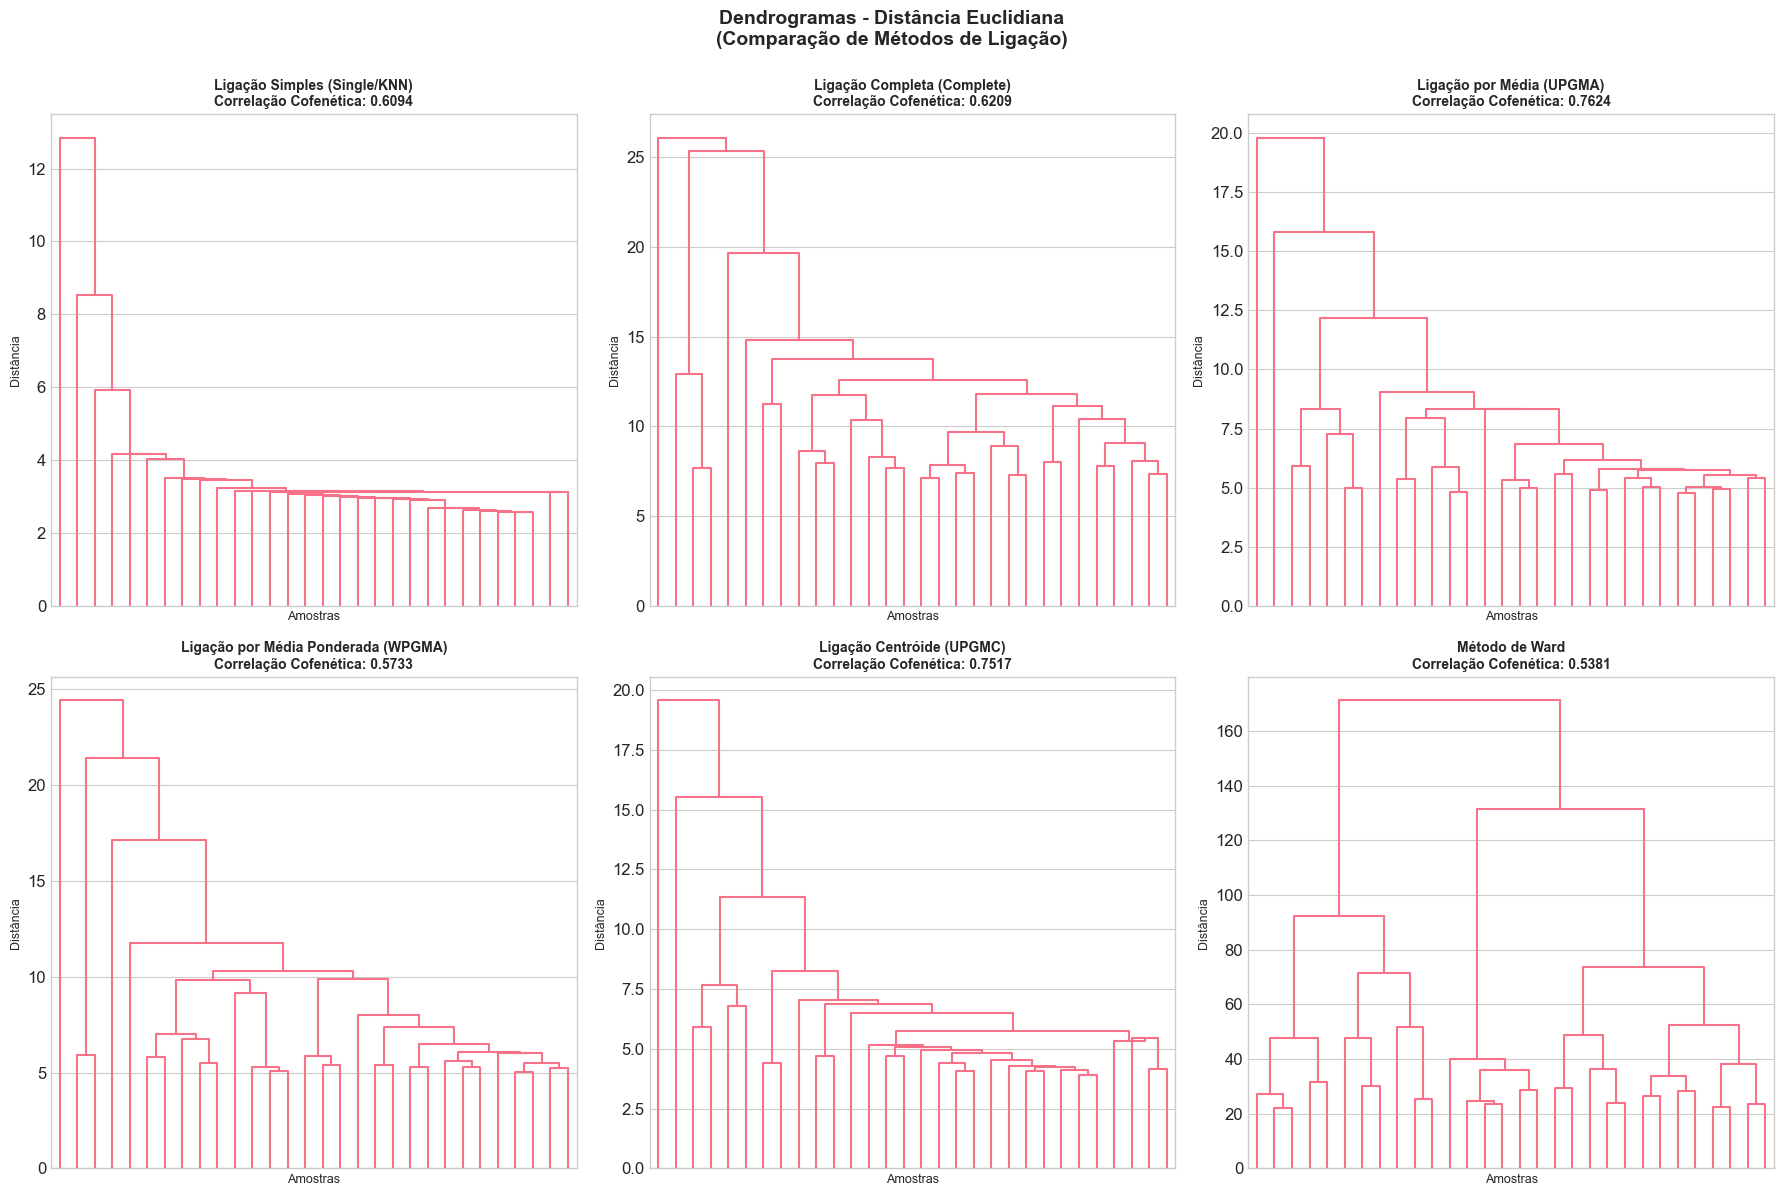

✓ Gráficos salvos: hca_dendrogramas_euclidean.png


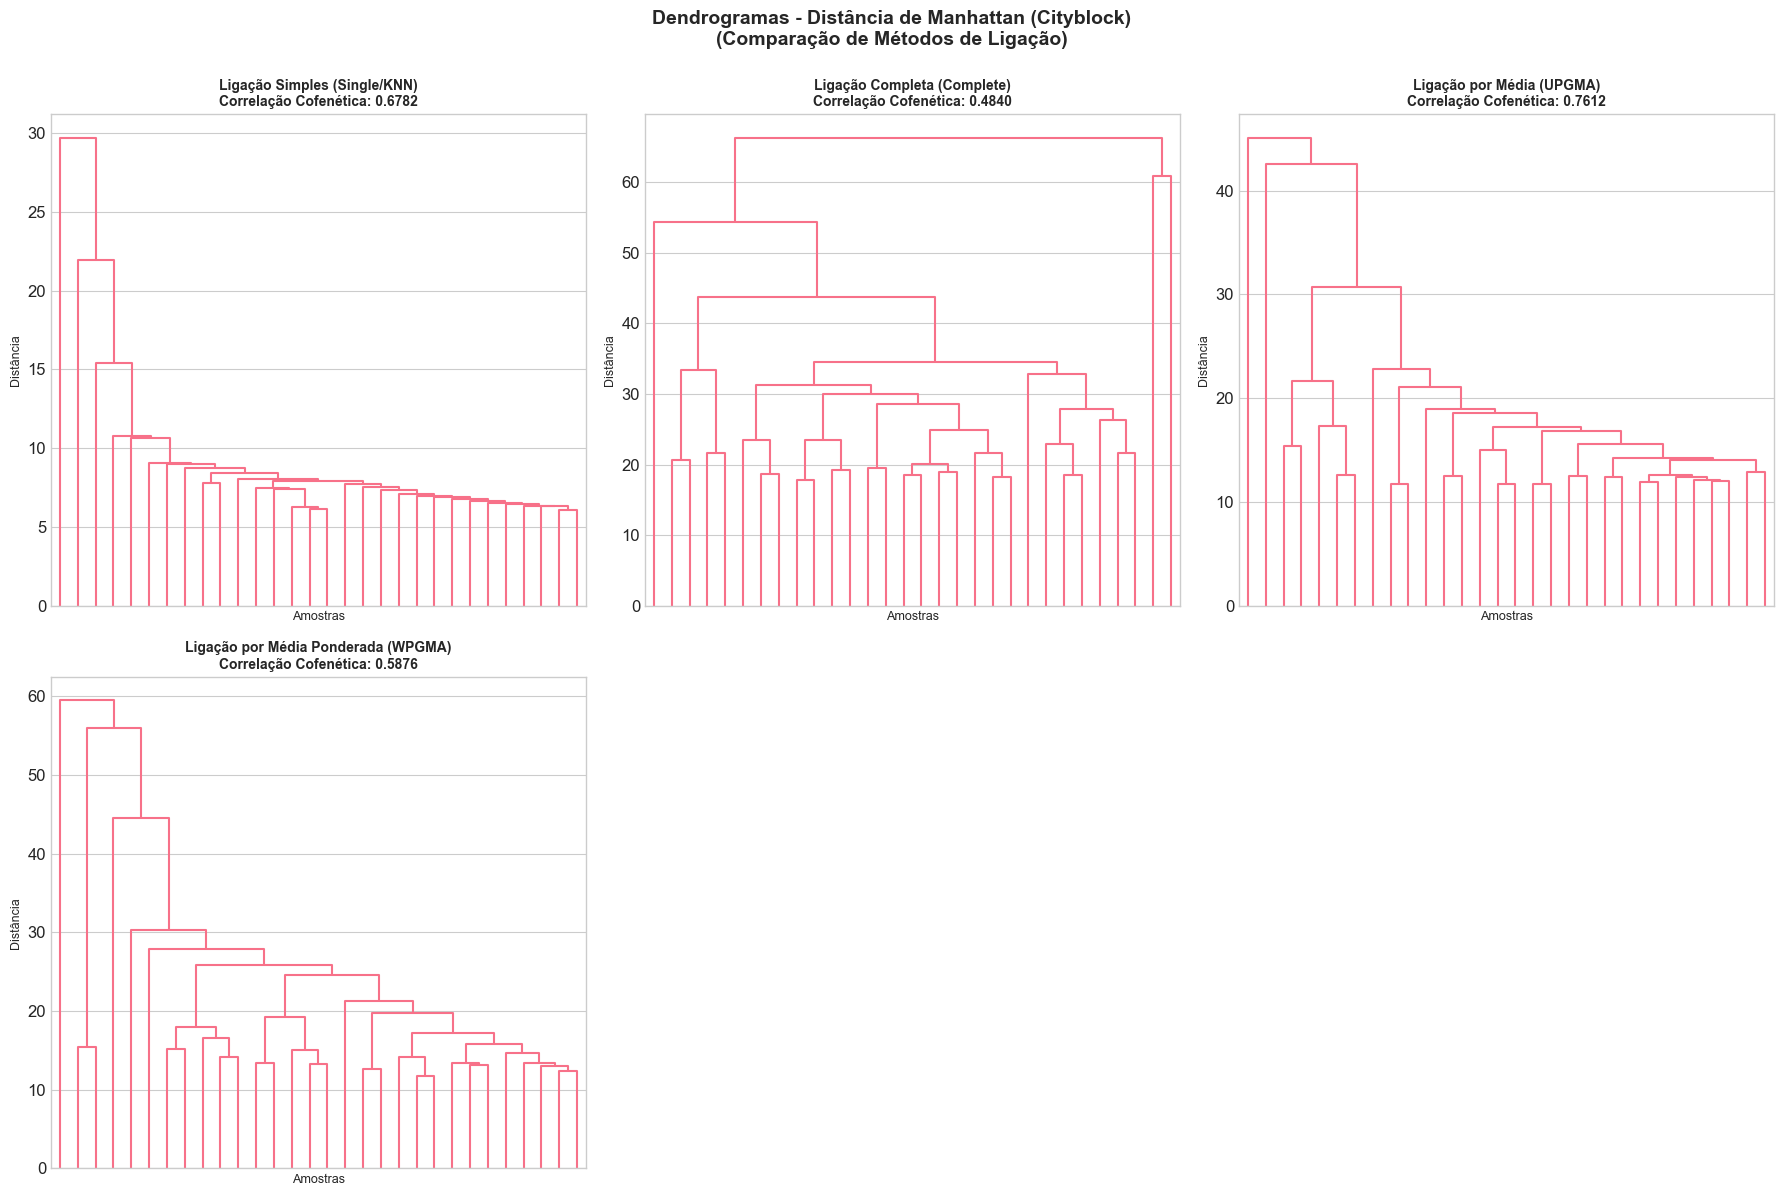

✓ Gráficos salvos: hca_dendrogramas_manhattan.png


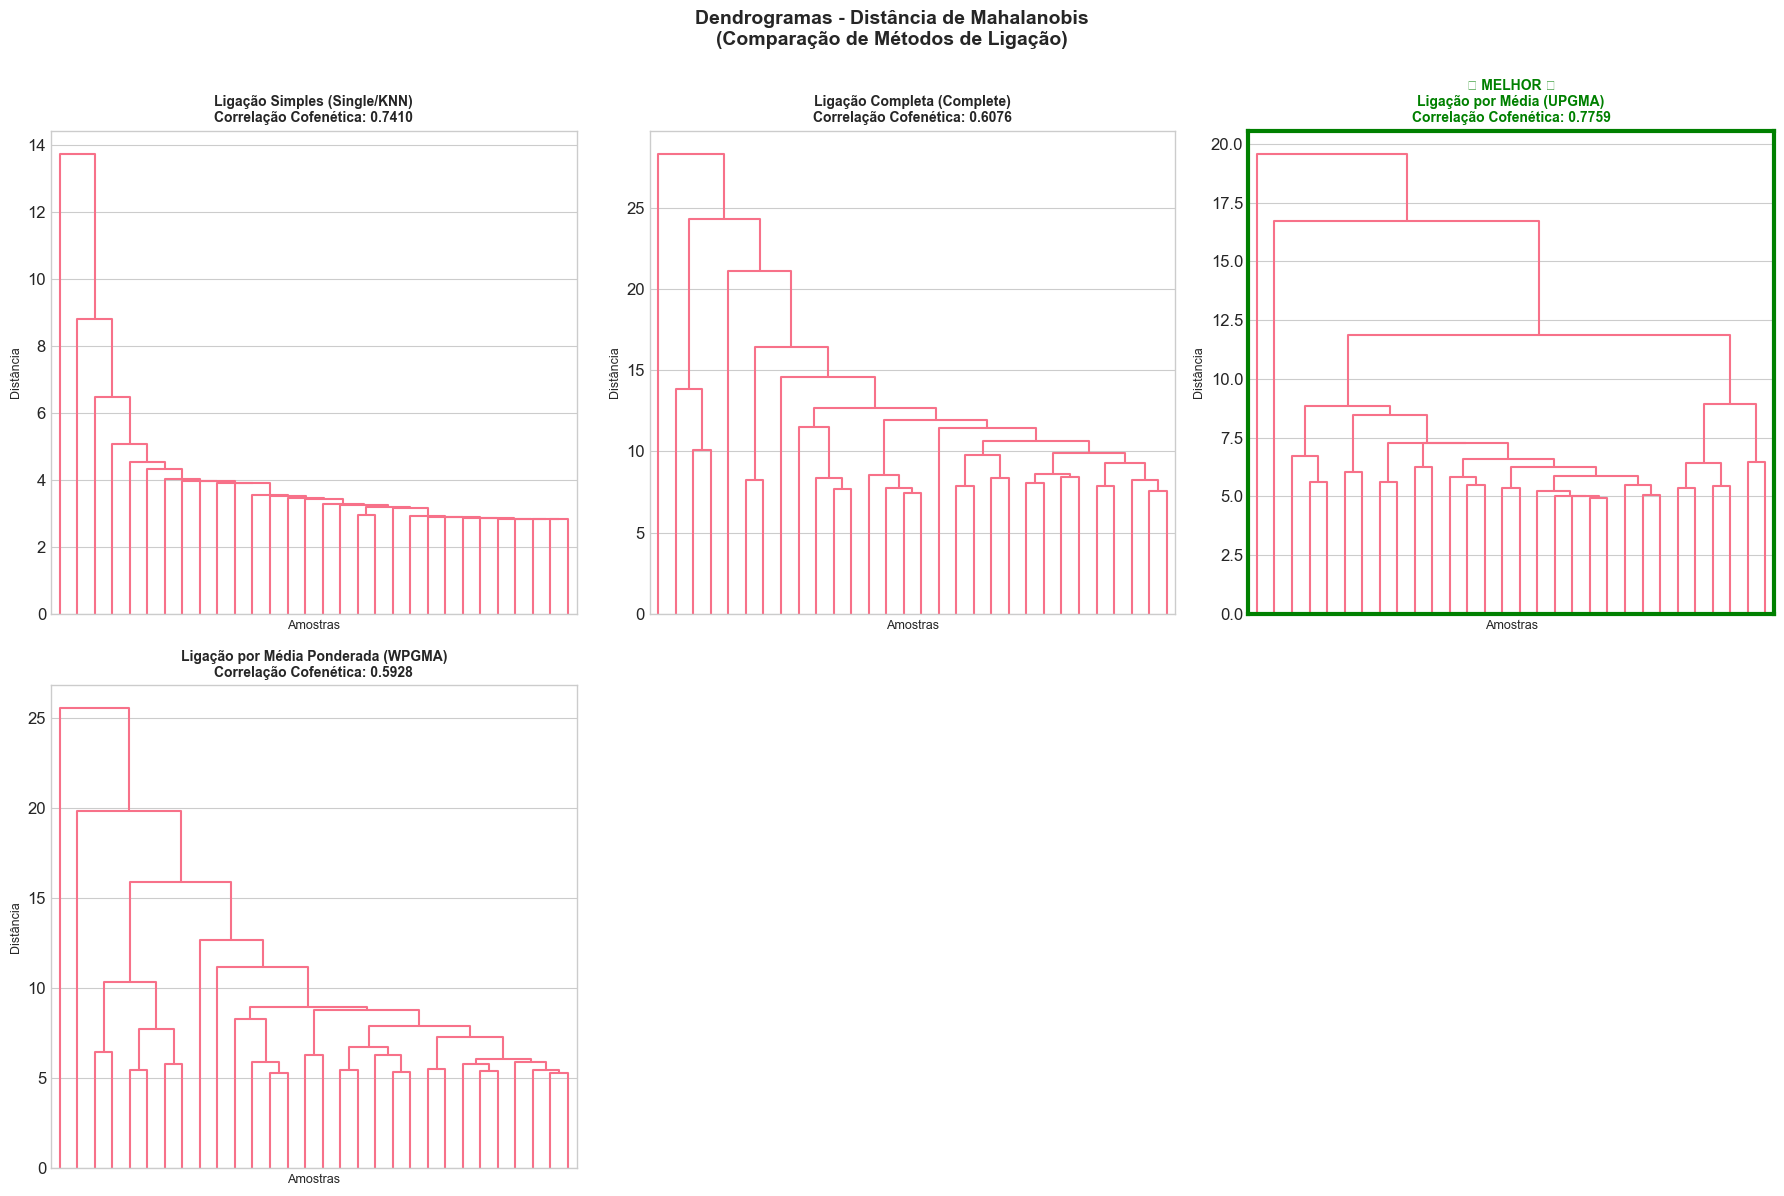

✓ Gráficos salvos: hca_dendrogramas_mahalanobis.png

TABELA RESUMO - TODAS AS COMBINAÇÕES

                 Métrica Distância                      Método Linkage Código Métrica Código Método  Correlação Cofenética
          Distância de Mahalanobis           Ligação por Média (UPGMA)    mahalanobis       average               0.775899
              Distância Euclidiana           Ligação por Média (UPGMA)      euclidean       average               0.762389
Distância de Manhattan (Cityblock)           Ligação por Média (UPGMA)      manhattan       average               0.761231
              Distância Euclidiana           Ligação Centróide (UPGMC)      euclidean      centroid               0.751741
          Distância de Mahalanobis        Ligação Simples (Single/KNN)    mahalanobis        single               0.740986
Distância de Manhattan (Cityblock)        Ligação Simples (Single/KNN)      manhattan        single               0.678187
              Distância Euclidiana         Ligaç

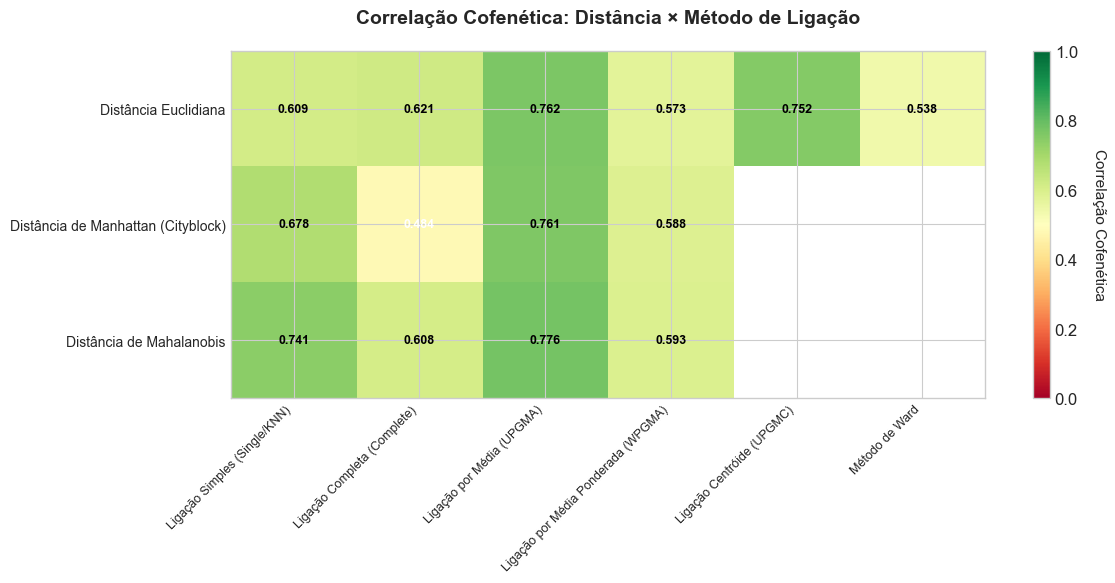

✓ Heatmap salvo: hca_heatmap_copheneticas.png

DETERMINAÇÃO DO NÚMERO DE CLUSTERS

Avaliando de 2 a 10 clusters...
Usando: Distância de Mahalanobis + Ligação por Média (UPGMA)

k     Silhouette      Calinski-H      Davies-B        Inércia
-----------------------------------------------------------------
2     0.7802          35.84           0.1562          69391.41
3     0.7259          29.30           0.1832          69150.29
4     0.6408          116.80          0.3547          66201.77
5     0.6207          90.38           0.4657          66093.92
6     0.4970          83.03           0.5738          65579.86
7     0.4143          72.82           0.6369          65373.12
8     0.3951          69.49           0.6561          64908.63
9     0.3596          62.39           0.6987          64789.81
10    0.3393          56.06           0.7433          64739.12

Número ótimo de clusters por métrica:
  • Silhouette: k = 2
  • Calinski-Harabasz: k = 4
  • Davies-Bouldin: k = 2
  • Cotovelo

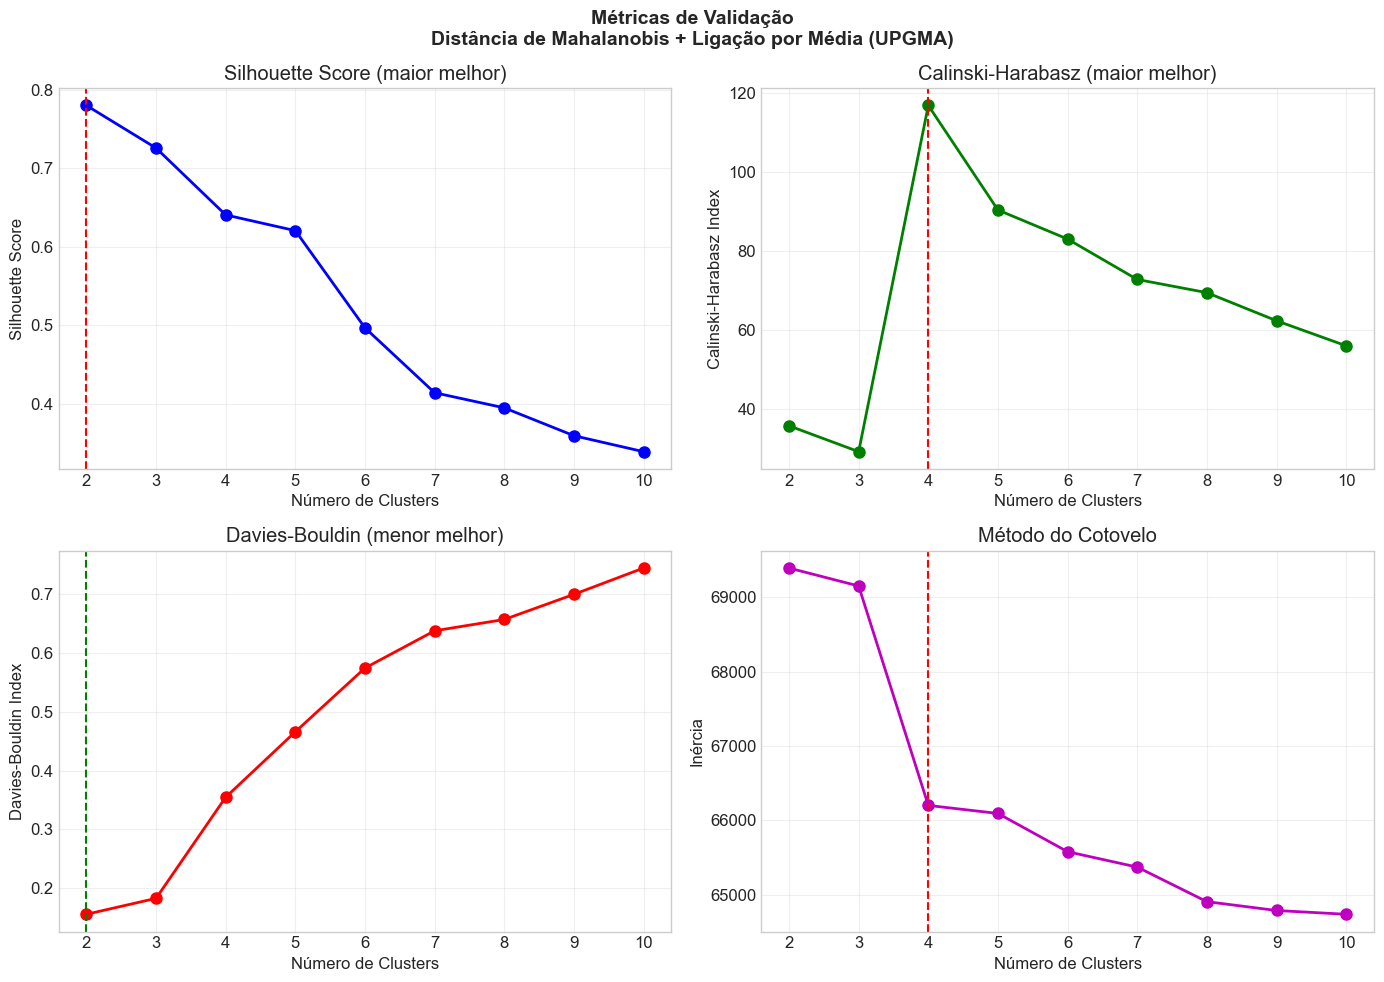

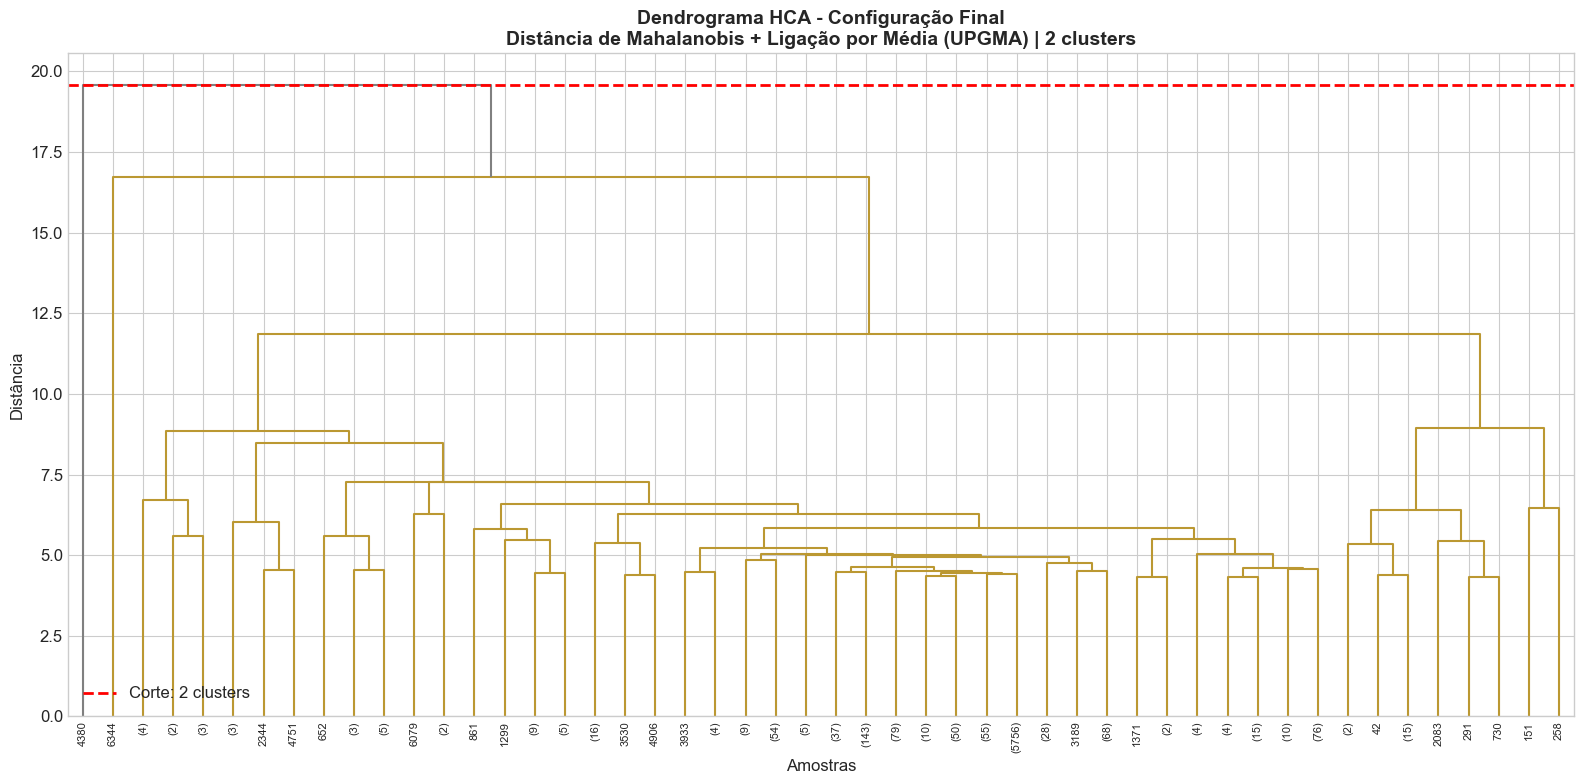

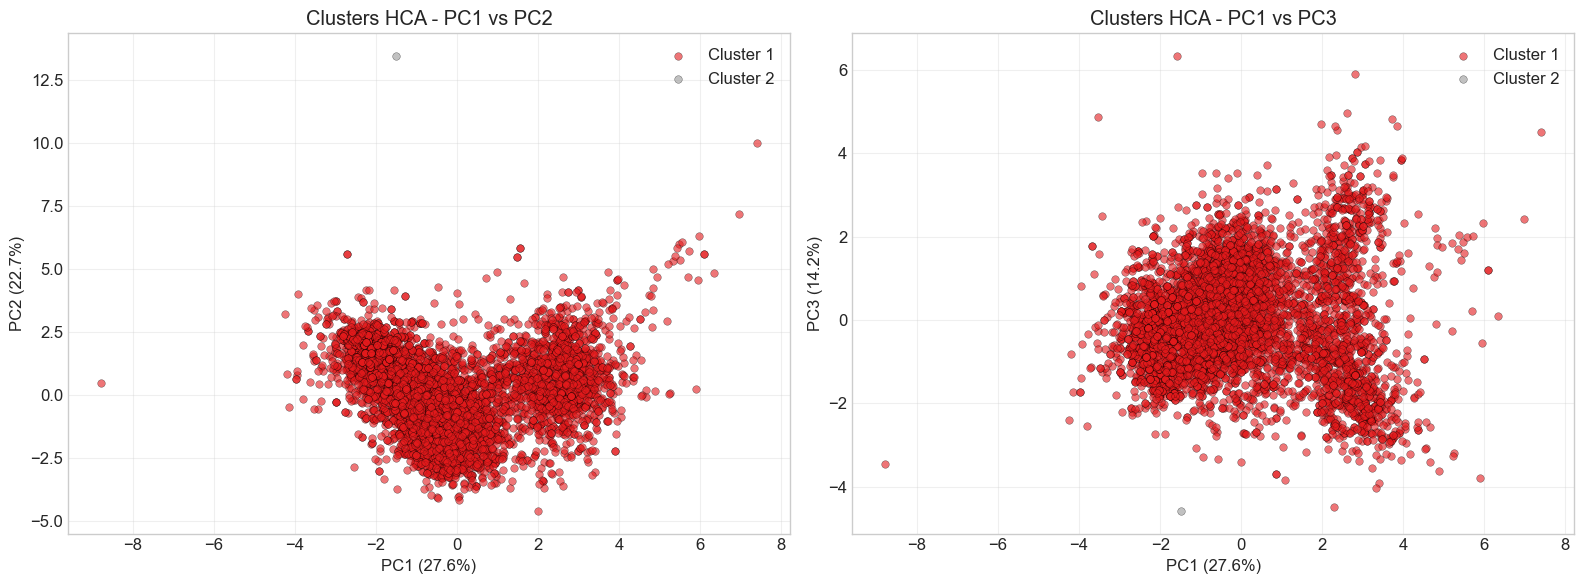


DISTRIBUIÇÃO DE AMOSTRAS POR CLUSTER
Cluster 1: 6496 amostras (100.0%)
Cluster 2: 1 amostras (0.0%)

✓ Resultados salvos: hca_resultados_finais.csv

ANÁLISE HCA CONCLUÍDA



In [83]:
# =============================================================================
# ANÁLISE DE CLUSTER HIERÁRQUICO (HCA) - VERSÃO COMPLETA
# Métricas de Distância: Euclidiana, Manhattan, Mahalanobis
# Métodos de Ligação: Single, Complete, Average, Weighted, Centroid, Ward
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, inconsistent
from scipy.spatial.distance import pdist, squareform, mahalanobis
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# PREPARAÇÃO DOS DADOS
# =============================================================================

# Converter y para array numérico se for DataFrame
if isinstance(y, pd.DataFrame):
    y_values = y.values.ravel()
elif isinstance(y, pd.Series):
    y_values = y.values
else:
    y_values = np.array(y).ravel()

# Criar variáveis de tipo e qualidade se não existirem
if 'y_type' not in dir():
    y_type = df['wine_type']

if 'y_quality_class' not in dir():
    # Criar classes de qualidade
    y_quality_class = pd.cut(y_values, 
                              bins=[0, 4, 6, 10], 
                              labels=['Baixa', 'Média', 'Alta'])

# Definir cores se não existirem
if 'colors_type' not in dir():
    colors_type = {'red': 'crimson', 'white': 'gold'}

if 'colors_quality' not in dir():
    colors_quality = {'Baixa': 'red', 'Média': 'orange', 'Alta': 'green'}

# Definir feature_columns se não existir
if 'feature_columns' not in dir():
    feature_columns = [col for col in df.columns if col not in ['quality', 'wine_type']]

# =============================================================================
# USAR OS SCORES DO PCA
# =============================================================================

X_hca = T  # Usar todos os PCs selecionados

print("="*80)
print("ANÁLISE DE CLUSTER HIERÁRQUICO (HCA) - VERSÃO COMPLETA")
print("="*80)
print(f"Dados de entrada: {X_hca.shape[0]} amostras x {X_hca.shape[1]} componentes principais")
print(f"Componentes utilizados: PC1 a PC{n_comp_selecionados}")
print(f"Variância explicada total: {np.sum(var_exp)*100:.2f}%")
print("="*80)

# =============================================================================
# CONFIGURAÇÃO DOS CRITÉRIOS DE SELEÇÃO DO NÚMERO DE CLUSTERS
# =============================================================================

print("\n" + "="*80)
print("CONFIGURAÇÃO DOS CRITÉRIOS DE SELEÇÃO")
print("="*80)

NUMERO_CLUSTERS_PREDEFINIDO = None
DISTANCIA_CORTE_PREDEFINIDA = None
USAR_SELECAO_AUTOMATICA = True
MAX_CLUSTERS_AVALIAR = min(10, X_hca.shape[0] // 10)
MAX_CLUSTERS_AVALIAR = max(MAX_CLUSTERS_AVALIAR, 2)

print(f"Critério 1 - Número pré-conhecido: {NUMERO_CLUSTERS_PREDEFINIDO if NUMERO_CLUSTERS_PREDEFINIDO else 'Não definido'}")
print(f"Critério 2 - Distância de corte: {DISTANCIA_CORTE_PREDEFINIDA if DISTANCIA_CORTE_PREDEFINIDA else 'Não definida'}")
print(f"Critério 3 - Seleção automática: {'Ativada' if USAR_SELECAO_AUTOMATICA else 'Desativada'}")
print(f"Faixa de clusters a avaliar: 2 a {MAX_CLUSTERS_AVALIAR}")

# =============================================================================
# MÉTRICAS DE DISTÂNCIA
# =============================================================================

print("\n" + "="*80)
print("MÉTRICAS DE DISTÂNCIA")
print("="*80)

distance_metrics_info = {
    'euclidean': {
        'nome': 'Distância Euclidiana',
        'descricao': 'Distância em linha reta no espaço euclidiano',
        'formula': r'$d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$',
        'scipy_metric': 'euclidean'
    },
    'manhattan': {
        'nome': 'Distância de Manhattan (Cityblock)',
        'descricao': 'Soma das diferenças absolutas em cada dimensão',
        'formula': r'$d(x,y) = \sum_{i=1}^{n}|x_i - y_i|$',
        'scipy_metric': 'cityblock'
    },
    'mahalanobis': {
        'nome': 'Distância de Mahalanobis',
        'descricao': 'Distância que considera a correlação entre variáveis',
        'formula': r'$d(x,y) = \sqrt{(x-y)^T \Sigma^{-1} (x-y)}$',
        'scipy_metric': 'mahalanobis'
    }
}

print("\nMétricas de Distância disponíveis:")
print("-"*80)
for metric, info in distance_metrics_info.items():
    print(f"\n• {info['nome']} ({metric})")
    print(f"  {info['descricao']}")
    print(f"  Fórmula: {info['formula']}")

# =============================================================================
# MÉTODOS DE LIGAÇÃO (LINKAGE)
# =============================================================================

print("\n" + "="*80)
print("MÉTODOS DE LIGAÇÃO (LINKAGE)")
print("="*80)

linkage_methods_info = {
    'single': {
        'nome': 'Ligação Simples (Single/KNN)',
        'descricao': 'Distância mínima entre pontos de clusters diferentes',
        'formula': r'$d(A,B) = \min\{d(a,b) : a \in A, b \in B\}$',
        'compatible_metrics': ['euclidean', 'manhattan', 'mahalanobis']
    },
    'complete': {
        'nome': 'Ligação Completa (Complete)',
        'descricao': 'Distância máxima entre pontos de clusters diferentes',
        'formula': r'$d(A,B) = \max\{d(a,b) : a \in A, b \in B\}$',
        'compatible_metrics': ['euclidean', 'manhattan', 'mahalanobis']
    },
    'average': {
        'nome': 'Ligação por Média (UPGMA)',
        'descricao': 'Média das distâncias entre todos os pares de pontos',
        'formula': r'$d(A,B) = \frac{\sum d(a,b)}{|A| \times |B|}$',
        'compatible_metrics': ['euclidean', 'manhattan', 'mahalanobis']
    },
    'weighted': {
        'nome': 'Ligação por Média Ponderada (WPGMA)',
        'descricao': 'Média ponderada das distâncias',
        'formula': r'$d(A \cup B,C) = \frac{d(A,C) + d(B,C)}{2}$',
        'compatible_metrics': ['euclidean', 'manhattan', 'mahalanobis']
    },
    'centroid': {
        'nome': 'Ligação Centróide (UPGMC)',
        'descricao': 'Distância entre os centróides dos clusters',
        'formula': r'$d(A,B) = \|c_A - c_B\|$',
        'compatible_metrics': ['euclidean']  # Apenas euclidiana
    },
    'ward': {
        'nome': 'Método de Ward',
        'descricao': 'Minimiza a variância intra-cluster',
        'formula': r'$\Delta(A,B) = \frac{n_A n_B}{n_A+n_B} \|c_A - c_B\|^2$',
        'compatible_metrics': ['euclidean']  # Apenas euclidiana
    }
}

linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']

print("\nMétodos de Ligação disponíveis:")
print("-"*80)
for method, info in linkage_methods_info.items():
    print(f"\n• {info['nome']} ({method})")
    print(f"  {info['descricao']}")
    print(f"  Fórmula: {info['formula']}")
    print(f"  Compatível com: {', '.join(info['compatible_metrics'])}")

# =============================================================================
# CÁLCULO DAS MATRIZES DE DISTÂNCIAS
# =============================================================================

print("\n" + "="*80)
print("CÁLCULO DAS MATRIZES DE DISTÂNCIAS")
print("="*80)

distance_matrices = {}

# 1. Distância Euclidiana
dist_euclidean = pdist(X_hca, metric='euclidean')
distance_matrices['euclidean'] = dist_euclidean
print(f"\n✓ Euclidiana - Min: {dist_euclidean.min():.4f}, Max: {dist_euclidean.max():.4f}, Média: {dist_euclidean.mean():.4f}")

# 2. Distância de Manhattan
dist_manhattan = pdist(X_hca, metric='cityblock')
distance_matrices['manhattan'] = dist_manhattan
print(f"✓ Manhattan  - Min: {dist_manhattan.min():.4f}, Max: {dist_manhattan.max():.4f}, Média: {dist_manhattan.mean():.4f}")

# 3. Distância de Mahalanobis
# Calcular matriz de covariância inversa
try:
    # Usar covariância empírica robusta
    cov_estimator = EmpiricalCovariance()
    cov_estimator.fit(X_hca)
    VI = cov_estimator.get_precision()  # Matriz de covariância inversa
    
    # Calcular distâncias de Mahalanobis manualmente
    n_samples = X_hca.shape[0]
    dist_mahalanobis_list = []
    
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            diff = X_hca[i] - X_hca[j]
            dist = np.sqrt(diff.dot(VI).dot(diff.T))
            dist_mahalanobis_list.append(dist)
    
    dist_mahalanobis = np.array(dist_mahalanobis_list)
    distance_matrices['mahalanobis'] = dist_mahalanobis
    print(f"✓ Mahalanobis- Min: {dist_mahalanobis.min():.4f}, Max: {dist_mahalanobis.max():.4f}, Média: {dist_mahalanobis.mean():.4f}")
    mahalanobis_available = True
    
except Exception as e:
    print(f"✗ Mahalanobis - Erro ao calcular: {str(e)[:50]}")
    print("  (Continuando sem Mahalanobis)")
    mahalanobis_available = False

# =============================================================================
# AVALIAÇÃO DE TODAS AS COMBINAÇÕES (DISTÂNCIA x LINKAGE)
# =============================================================================

print("\n" + "="*80)
print("ANÁLISE DE TODAS AS COMBINAÇÕES (DISTÂNCIA × LINKAGE)")
print("="*80)

# Estrutura para armazenar resultados
results_all = {}
cophenet_all = {}

# Lista de métricas disponíveis
available_metrics = ['euclidean', 'manhattan']
if mahalanobis_available:
    available_metrics.append('mahalanobis')

print(f"\n{'Métrica':<15} {'Método Linkage':<25} {'Correlação Cofenética':<25} {'Status'}")
print("-"*90)

for metric in available_metrics:
    results_all[metric] = {}
    cophenet_all[metric] = {}
    
    for method in linkage_methods:
        # Verificar compatibilidade
        if metric not in linkage_methods_info[method]['compatible_metrics']:
            print(f"{metric:<15} {method:<25} {'N/A':<25} Incompatível")
            continue
        
        try:
            # Calcular linkage
            if method in ['centroid', 'ward']:
                # Estes métodos precisam dos dados originais (apenas euclidiana)
                if metric == 'euclidean':
                    Z = linkage(X_hca, method=method, metric='euclidean')
                else:
                    continue
            else:
                # Outros métodos podem usar matriz de distâncias
                Z = linkage(distance_matrices[metric], method=method)
            
            # Coeficiente de correlação cofenética
            coph_corr, coph_dists = cophenet(Z, distance_matrices[metric])
            
            # Armazenar resultados
            results_all[metric][method] = Z
            cophenet_all[metric][method] = coph_corr
            
            # Interpretação
            if coph_corr >= 0.85:
                interp = "Excelente"
            elif coph_corr >= 0.75:
                interp = "Bom"
            elif coph_corr >= 0.65:
                interp = "Moderado"
            else:
                interp = "Fraco"
            
            print(f"{metric:<15} {method:<25} {coph_corr:<25.4f} {interp}")
            
        except Exception as e:
            print(f"{metric:<15} {method:<25} Erro: {str(e)[:30]}")
            cophenet_all[metric][method] = 0

# =============================================================================
# SELEÇÃO DA MELHOR COMBINAÇÃO
# =============================================================================

print("\n" + "="*80)
print("SELEÇÃO DA MELHOR COMBINAÇÃO (DISTÂNCIA × LINKAGE)")
print("="*80)

# Encontrar a melhor combinação global
best_cophenet = -1
best_metric = None
best_method = None

for metric in cophenet_all:
    for method in cophenet_all[metric]:
        if cophenet_all[metric][method] > best_cophenet:
            best_cophenet = cophenet_all[metric][method]
            best_metric = metric
            best_method = method

print(f"\n>>> MELHOR COMBINAÇÃO GLOBAL:")
print(f"    Métrica de Distância: {distance_metrics_info[best_metric]['nome']}")
print(f"    Método de Ligação: {linkage_methods_info[best_method]['nome']}")
print(f"    Correlação Cofenética: {best_cophenet:.4f}")

Z_best = results_all[best_metric][best_method]

# =============================================================================
# VISUALIZAÇÃO COMPARATIVA - TODAS AS COMBINAÇÕES
# =============================================================================

print("\n" + "="*80)
print("GERANDO GRÁFICOS COMPARATIVOS...")
print("="*80)

# Para cada métrica de distância, plotar todos os métodos de ligação
for metric in available_metrics:
    
    metric_name = distance_metrics_info[metric]['nome']
    
    # Contar quantos métodos estão disponíveis para esta métrica
    available_methods = [m for m in linkage_methods 
                        if m in results_all[metric] and results_all[metric][m] is not None]
    
    if len(available_methods) == 0:
        continue
    
    # Criar figura com subplots
    n_methods = len(available_methods)
    n_cols = 3
    n_rows = int(np.ceil(n_methods / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for idx, method in enumerate(available_methods):
        ax = axes[idx]
        
        Z = results_all[metric][method]
        coph = cophenet_all[metric][method]
        
        # Plotar dendrograma
        dendrogram(
            Z,
            ax=ax,
            truncate_mode='lastp',
            p=30,
            leaf_rotation=90,
            leaf_font_size=6,
            no_labels=True,
            color_threshold=0
        )
        
        # Título com informações
        title = f"{linkage_methods_info[method]['nome']}\n"
        title += f"Correlação Cofenética: {coph:.4f}"
        
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlabel('Amostras', fontsize=9)
        ax.set_ylabel('Distância', fontsize=9)
        
        # Destacar se for a melhor combinação global
        if metric == best_metric and method == best_method:
            ax.set_title(f"★ MELHOR ★\n{title}", 
                        fontsize=10, fontweight='bold', color='green')
            for spine in ax.spines.values():
                spine.set_edgecolor('green')
                spine.set_linewidth(3)
    
    # Remover subplots vazios
    for idx in range(len(available_methods), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.suptitle(f'Dendrogramas - {metric_name}\n(Comparação de Métodos de Ligação)', 
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'hca_dendrogramas_{metric}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Gráficos salvos: hca_dendrogramas_{metric}.png")

# =============================================================================
# TABELA RESUMO DE TODAS AS COMBINAÇÕES
# =============================================================================

print("\n" + "="*80)
print("TABELA RESUMO - TODAS AS COMBINAÇÕES")
print("="*80)

summary_data = []
for metric in cophenet_all:
    for method in cophenet_all[metric]:
        if cophenet_all[metric][method] > 0:
            summary_data.append({
                'Métrica Distância': distance_metrics_info[metric]['nome'],
                'Método Linkage': linkage_methods_info[method]['nome'],
                'Código Métrica': metric,
                'Código Método': method,
                'Correlação Cofenética': cophenet_all[metric][method]
            })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Correlação Cofenética', ascending=False)

print("\n" + summary_df.to_string(index=False))
print("\n")

# Salvar tabela
summary_df.to_csv('hca_resumo_combinacoes.csv', index=False)
print("✓ Tabela salva: hca_resumo_combinacoes.csv")

# =============================================================================
# HEATMAP DE CORRELAÇÕES COFENÉTICAS
# =============================================================================

# Criar matriz para heatmap
heatmap_data = np.zeros((len(available_metrics), len(linkage_methods)))
heatmap_data[:] = np.nan

for i, metric in enumerate(available_metrics):
    for j, method in enumerate(linkage_methods):
        if method in cophenet_all[metric]:
            heatmap_data[i, j] = cophenet_all[metric][method]

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

# Configurar eixos
ax.set_xticks(range(len(linkage_methods)))
ax.set_yticks(range(len(available_metrics)))
ax.set_xticklabels([linkage_methods_info[m]['nome'] for m in linkage_methods], 
                   rotation=45, ha='right', fontsize=9)
ax.set_yticklabels([distance_metrics_info[m]['nome'] for m in available_metrics], 
                   fontsize=10)

# Adicionar valores nas células
for i in range(len(available_metrics)):
    for j in range(len(linkage_methods)):
        if not np.isnan(heatmap_data[i, j]):
            text_color = 'white' if heatmap_data[i, j] < 0.5 else 'black'
            text = ax.text(j, i, f'{heatmap_data[i, j]:.3f}',
                          ha='center', va='center', color=text_color, 
                          fontsize=9, fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlação Cofenética', rotation=270, labelpad=20, fontsize=11)

ax.set_title('Correlação Cofenética: Distância × Método de Ligação', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('hca_heatmap_copheneticas.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Heatmap salvo: hca_heatmap_copheneticas.png")

# =============================================================================
# DETERMINAÇÃO DO NÚMERO DE CLUSTERS
# =============================================================================

print("\n" + "="*80)
print("DETERMINAÇÃO DO NÚMERO DE CLUSTERS")
print("="*80)

if USAR_SELECAO_AUTOMATICA:
    
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    inertias = []
    
    cluster_range = range(2, MAX_CLUSTERS_AVALIAR + 1)
    
    print(f"\nAvaliando de 2 a {MAX_CLUSTERS_AVALIAR} clusters...")
    print(f"Usando: {distance_metrics_info[best_metric]['nome']} + {linkage_methods_info[best_method]['nome']}")
    
    for n_clusters in cluster_range:
        cluster_labels_temp = fcluster(Z_best, n_clusters, criterion='maxclust')
        
        # Métricas de avaliação
        sil_score = silhouette_score(X_hca, cluster_labels_temp)
        ch_score = calinski_harabasz_score(X_hca, cluster_labels_temp)
        db_score = davies_bouldin_score(X_hca, cluster_labels_temp)
        
        silhouette_scores.append(sil_score)
        calinski_scores.append(ch_score)
        davies_bouldin_scores.append(db_score)
        
        # Calcular inércia
        inertia = 0
        for c in np.unique(cluster_labels_temp):
            mask = cluster_labels_temp == c
            if np.sum(mask) > 1:
                centroid = X_hca[mask].mean(axis=0)
                inertia += np.sum((X_hca[mask] - centroid)**2)
        inertias.append(inertia)
    
    print(f"\n{'k':<5} {'Silhouette':<15} {'Calinski-H':<15} {'Davies-B':<15} {'Inércia'}")
    print("-"*65)
    for i, n_clusters in enumerate(cluster_range):
        print(f"{n_clusters:<5} {silhouette_scores[i]:<15.4f} {calinski_scores[i]:<15.2f} "
              f"{davies_bouldin_scores[i]:<15.4f} {inertias[i]:<.2f}")
    
    # Determinar número ótimo
    optimal_k_silhouette = np.argmax(silhouette_scores) + 2
    optimal_k_calinski = np.argmax(calinski_scores) + 2
    optimal_k_davies = np.argmin(davies_bouldin_scores) + 2
    
    # Método do cotovelo
    if len(inertias) >= 3:
        second_derivative = np.diff(np.array(inertias), 2)
        optimal_k_elbow = np.argmax(second_derivative) + 3
    else:
        optimal_k_elbow = 2
    
    # Análise de gaps
    heights = Z_best[:, 2]
    height_diffs = np.diff(heights)
    largest_gap_idx = np.argmax(height_diffs[-MAX_CLUSTERS_AVALIAR:])
    optimal_k_gap = MAX_CLUSTERS_AVALIAR - largest_gap_idx
    
    print(f"\nNúmero ótimo de clusters por métrica:")
    print(f"  • Silhouette: k = {optimal_k_silhouette}")
    print(f"  • Calinski-Harabasz: k = {optimal_k_calinski}")
    print(f"  • Davies-Bouldin: k = {optimal_k_davies}")
    print(f"  • Cotovelo: k = {optimal_k_elbow}")
    print(f"  • Gap Dendrograma: k = {optimal_k_gap}")
    
    # Consenso
    all_suggestions = [optimal_k_silhouette, optimal_k_calinski, optimal_k_davies, 
                       optimal_k_elbow, optimal_k_gap]
    optimal_k = int(np.median(all_suggestions))
    
    print(f"\n>>> Consenso (mediana): k = {optimal_k}")

# Seleção final
if NUMERO_CLUSTERS_PREDEFINIDO is not None:
    optimal_k = NUMERO_CLUSTERS_PREDEFINIDO
    selection_method = "Número pré-definido"
elif DISTANCIA_CORTE_PREDEFINIDA is not None:
    cluster_labels = fcluster(Z_best, DISTANCIA_CORTE_PREDEFINIDA, criterion='distance')
    optimal_k = len(np.unique(cluster_labels))
    selection_method = "Distância de corte"
else:
    selection_method = "Seleção automática"

cluster_labels = fcluster(Z_best, optimal_k, criterion='maxclust')
threshold = Z_best[-(optimal_k-1), 2] if optimal_k <= Z_best.shape[0] else Z_best[-1, 2]

# Métricas finais
final_sil = silhouette_score(X_hca, cluster_labels)
final_ch = calinski_harabasz_score(X_hca, cluster_labels)
final_db = davies_bouldin_score(X_hca, cluster_labels)

print(f"\n" + "="*80)
print(f"CONFIGURAÇÃO FINAL")
print(f"="*80)
print(f"Métrica de Distância: {distance_metrics_info[best_metric]['nome']}")
print(f"Método de Ligação: {linkage_methods_info[best_method]['nome']}")
print(f"Número de clusters: {optimal_k}")
print(f"Método de seleção: {selection_method}")
print(f"\nMétricas de Qualidade:")
print(f"  Correlação Cofenética: {best_cophenet:.4f}")
print(f"  Silhouette Score: {final_sil:.4f}")
print(f"  Calinski-Harabasz: {final_ch:.2f}")
print(f"  Davies-Bouldin: {final_db:.4f}")

# =============================================================================
# GRÁFICOS DE MÉTRICAS
# =============================================================================

if USAR_SELECAO_AUTOMATICA:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Silhouette
    axes[0, 0].plot(list(cluster_range), silhouette_scores, 'bo-', linewidth=2, markersize=8)
    axes[0, 0].axvline(x=optimal_k_silhouette, color='red', linestyle='--')
    axes[0, 0].set_xlabel('Número de Clusters')
    axes[0, 0].set_ylabel('Silhouette Score')
    axes[0, 0].set_title('Silhouette Score (maior melhor)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Calinski-Harabasz
    axes[0, 1].plot(list(cluster_range), calinski_scores, 'go-', linewidth=2, markersize=8)
    axes[0, 1].axvline(x=optimal_k_calinski, color='red', linestyle='--')
    axes[0, 1].set_xlabel('Número de Clusters')
    axes[0, 1].set_ylabel('Calinski-Harabasz Index')
    axes[0, 1].set_title('Calinski-Harabasz (maior melhor)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Davies-Bouldin
    axes[1, 0].plot(list(cluster_range), davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
    axes[1, 0].axvline(x=optimal_k_davies, color='green', linestyle='--')
    axes[1, 0].set_xlabel('Número de Clusters')
    axes[1, 0].set_ylabel('Davies-Bouldin Index')
    axes[1, 0].set_title('Davies-Bouldin (menor melhor)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Inércia
    axes[1, 1].plot(list(cluster_range), inertias, 'mo-', linewidth=2, markersize=8)
    axes[1, 1].axvline(x=optimal_k_elbow, color='red', linestyle='--')
    axes[1, 1].set_xlabel('Número de Clusters')
    axes[1, 1].set_ylabel('Inércia')
    axes[1, 1].set_title('Método do Cotovelo')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'Métricas de Validação\n{distance_metrics_info[best_metric]["nome"]} + {linkage_methods_info[best_method]["nome"]}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('hca_metricas_validacao.png', dpi=150, bbox_inches='tight')
    plt.show()

# =============================================================================
# DENDROGRAMA FINAL
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 8))

dendrogram(
    Z_best, 
    ax=ax,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=threshold,
    above_threshold_color='gray'
)

ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Corte: {optimal_k} clusters')
ax.set_xlabel('Amostras', fontsize=12)
ax.set_ylabel('Distância', fontsize=12)
ax.set_title(f'Dendrograma HCA - Configuração Final\n{distance_metrics_info[best_metric]["nome"]} + {linkage_methods_info[best_method]["nome"]} | {optimal_k} clusters', 
             fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('hca_dendrograma_final.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZAÇÃO DOS CLUSTERS
# =============================================================================

colors_cluster = plt.cm.Set1(np.linspace(0, 1, optimal_k))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1 vs PC2
for i in range(optimal_k):
    mask = cluster_labels == (i + 1)
    axes[0].scatter(T_full_diag[mask, 0], T_full_diag[mask, 1], 
                   c=[colors_cluster[i]], label=f'Cluster {i+1}', 
                   alpha=0.6, s=30, edgecolors='k', linewidths=0.3)

axes[0].set_xlabel(f'PC1 ({all_var_exp[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({all_var_exp[1]*100:.1f}%)')
axes[0].set_title('Clusters HCA - PC1 vs PC2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PC1 vs PC3 (ou PC2 vs PC1)
if n_comp_selecionados >= 3:
    for i in range(optimal_k):
        mask = cluster_labels == (i + 1)
        axes[1].scatter(T_full_diag[mask, 0], T_full_diag[mask, 2], 
                       c=[colors_cluster[i]], label=f'Cluster {i+1}', 
                       alpha=0.6, s=30, edgecolors='k', linewidths=0.3)
    axes[1].set_xlabel(f'PC1 ({all_var_exp[0]*100:.1f}%)')
    axes[1].set_ylabel(f'PC3 ({all_var_exp[2]*100:.1f}%)')
    axes[1].set_title('Clusters HCA - PC1 vs PC3')
else:
    for i in range(optimal_k):
        mask = cluster_labels == (i + 1)
        axes[1].scatter(T_full_diag[mask, 1], T_full_diag[mask, 0], 
                       c=[colors_cluster[i]], label=f'Cluster {i+1}', 
                       alpha=0.6, s=30, edgecolors='k', linewidths=0.3)
    axes[1].set_xlabel(f'PC2 ({all_var_exp[1]*100:.1f}%)')
    axes[1].set_ylabel(f'PC1 ({all_var_exp[0]*100:.1f}%)')
    axes[1].set_title('Clusters HCA - PC2 vs PC1')

axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('hca_clusters_pca.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# DISTRIBUIÇÃO DOS CLUSTERS
# =============================================================================

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n{'='*80}")
print("DISTRIBUIÇÃO DE AMOSTRAS POR CLUSTER")
print(f"{'='*80}")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} amostras ({count/len(cluster_labels)*100:.1f}%)")

# Salvar resultados
resultados = pd.DataFrame({
    'Amostra': range(len(cluster_labels)),
    'Cluster': cluster_labels
})
resultados.to_csv('hca_resultados_finais.csv', index=False)
print("\n✓ Resultados salvos: hca_resultados_finais.csv")

print(f"\n{'='*80}")
print("ANÁLISE HCA CONCLUÍDA")
print(f"{'='*80}\n")

## 3.4 Classificação por K-vizinhos mais próximos (KNN)

% EXPLICAR KNN e verificar as diferenças com os slides do prof.



Conjunto de treino: 3724 amostras
Conjunto de teste: 1596 amostras


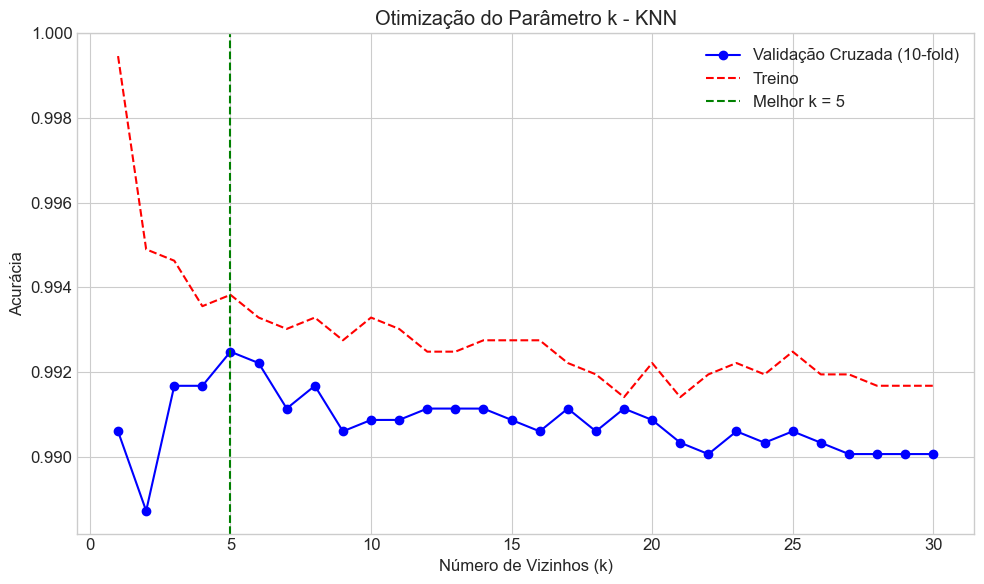


Melhor k: 5
Acurácia CV: 99.25%
RESULTADOS KNN - Classificação Tipo de Vinho

Acurácia no conjunto de teste: 99.12%

Relatório de Classificação:
              precision    recall  f1-score   support

         red       0.99      0.98      0.98       408
       white       0.99      0.99      0.99      1188

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



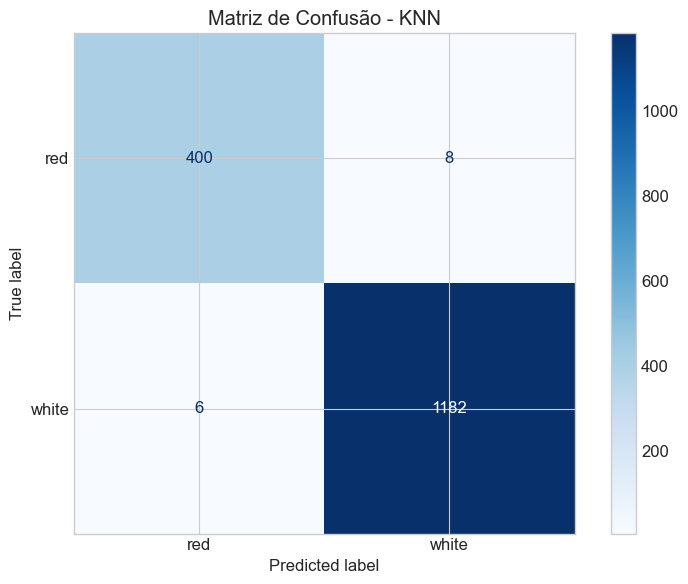

In [84]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_type_encoded, test_size=0.3, random_state=42, stratify=y_type_encoded
)

print(f"Conjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")

# %%
# Otimização do número de vizinhos (k)
k_range = range(1, 31)
cv_scores = []
train_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Score de validação cruzada
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    # Score de treino
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, 'b-o', label='Validação Cruzada (10-fold)')
plt.plot(k_range, train_scores, 'r--', label='Treino')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Otimização do Parâmetro k - KNN')
plt.legend()
plt.grid(True)

# Melhor k
best_k = k_range[np.argmax(cv_scores)]
plt.axvline(x=best_k, color='g', linestyle='--', label=f'Melhor k = {best_k}')
plt.legend()

plt.tight_layout()
plt.savefig('knn_otimizacao_k.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nMelhor k: {best_k}")
print(f"Acurácia CV: {max(cv_scores)*100:.2f}%")

# %%
# Modelo final KNN
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predições
y_pred_knn = knn_final.predict(X_test)

# Métricas
print("=" * 50)
print("RESULTADOS KNN - Classificação Tipo de Vinho")
print("=" * 50)
print(f"\nAcurácia no conjunto de teste: {accuracy_score(y_test, y_pred_knn)*100:.2f}%")
print(f"\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

# %%
# Matriz de confusão KNN
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=ax, cmap='Blues')
plt.title('Matriz de Confusão - KNN')
plt.tight_layout()
plt.savefig('knn_matriz_confusao.png', dpi=150, bbox_inches='tight')
plt.show()

## 3.5 Análise Discriminante por Mínimos Quadrados Parciais (PLS-DA)



PLS-DA PARA PREDIÇÃO DE QUALIDADE DE VINHOS

1. PREPARAÇÃO DOS DADOS

Distribuição das classes de qualidade:
  Classe  Código  Quantidade  Percentual
0   Alta       0        1009   18.966165
1  Baixa       1        1988   37.368421
2  Média       2        2323   43.665414

Número de classes: 3
Shape de y_binary: (5320, 3)
Classes: ['Alta' 'Baixa' 'Média']

2. DIVISÃO TREINO/TESTE (Estratificada)

Conjunto de Treino:
  X_train: (3724, 11)
  y_train: (3724,)
  y_train_binary: (3724, 3)

Conjunto de Teste:
  X_test: (1596, 11)
  y_test: (1596,)
  y_test_binary: (1596, 3)

Distribuição das classes no treino:
0     706
1    1392
2    1626
Name: count, dtype: int64

Distribuição das classes no teste:
0    303
1    596
2    697
Name: count, dtype: int64

3. SELEÇÃO DO NÚMERO ÓTIMO DE COMPONENTES

Testando número de componentes de 1 a 11
----------------------------------------------------------------------
Componentes:  1 | Acurácia CV: 0.5255 ± 0.0075
Componentes:  2 | Acurácia CV: 0.5542 ± 

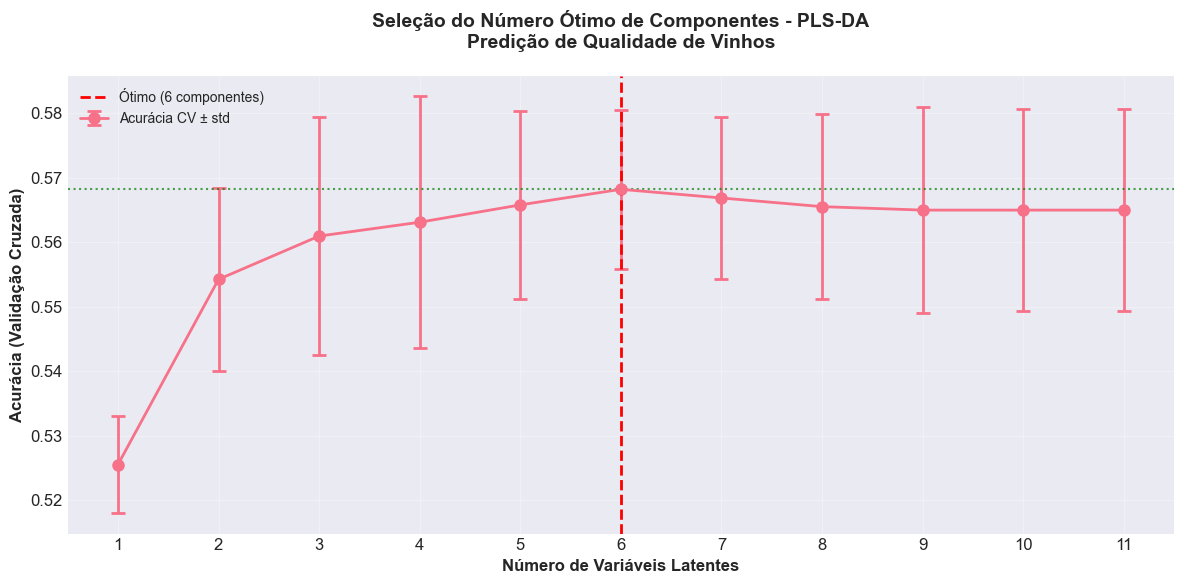


4. TREINAMENTO DO MODELO PLS-DA FINAL

Treinando 3 modelos PLS (One-vs-Rest)...
Usando 6 componentes latentes
----------------------------------------------------------------------

Classe 0: Alta
  R² (treino): 0.2073

Classe 1: Baixa
  R² (treino): 0.2459

Classe 2: Média
  R² (treino): 0.0288

MODELOS TREINADOS COM SUCESSO!

5. AVALIAÇÃO DO MODELO

                               ACURÁCIA                               
----------------------------------------------------------------------
  Treino: 0.5720 (57.20%)
  Teste:  0.6040 (60.40%)

RELATÓRIO DE CLASSIFICAÇÃO - CONJUNTO DE TESTE
              precision    recall  f1-score   support

        Alta     0.6250    0.1485    0.2400       303
       Baixa     0.6842    0.7198    0.7016       596
       Média     0.5463    0.7030    0.6148       697

    accuracy                         0.6040      1596
   macro avg     0.6185    0.5238    0.5188      1596
weighted avg     0.6127    0.6040    0.5760      1596


MATRIZ DE CONFUSÃO

M

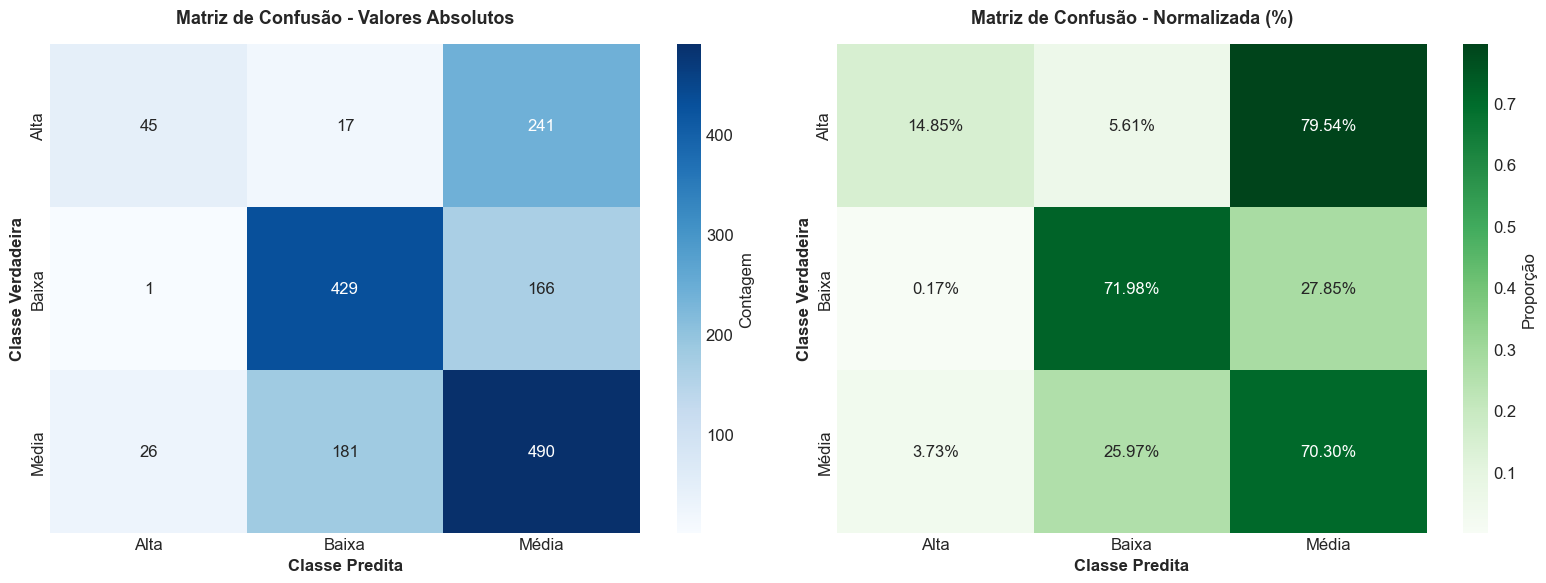


6. CURVAS ROC MULTICLASSE
Classe Alta   - AUC: 0.8220
Classe Baixa  - AUC: 0.8257
Classe Média  - AUC: 0.6273

AUC Micro-average: 0.7895


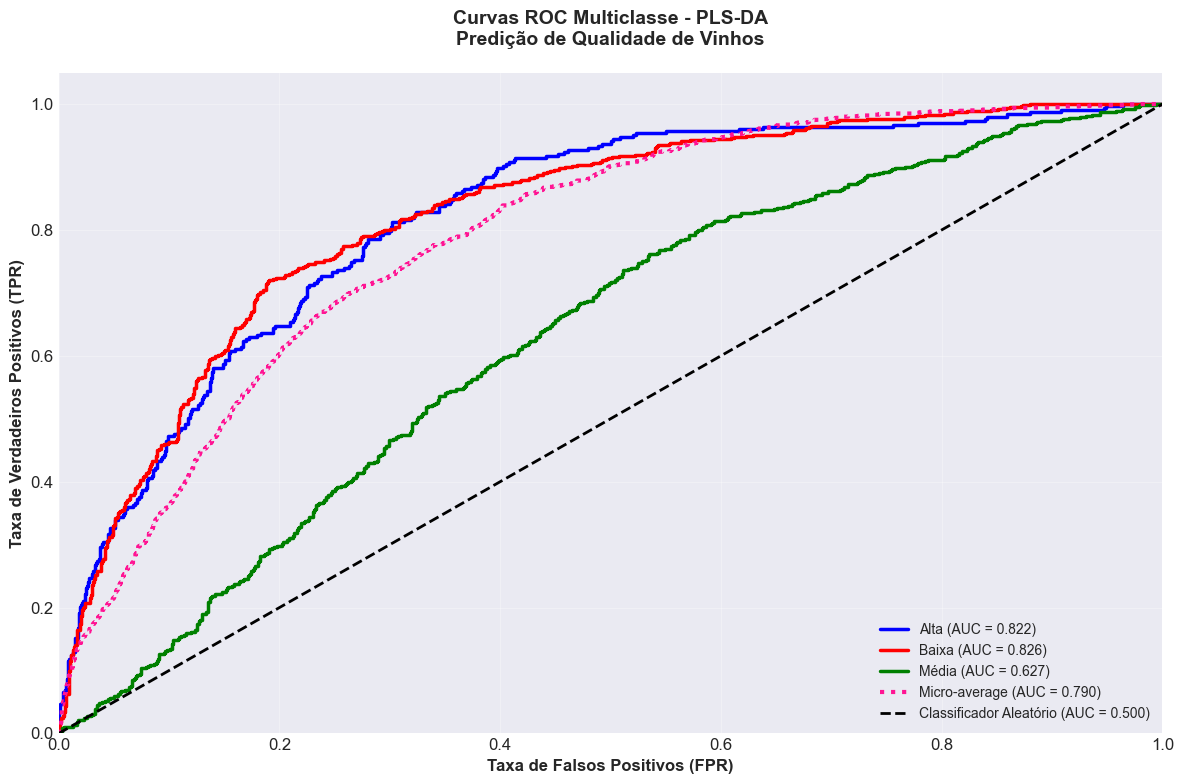


7. ANÁLISE DOS SCORES DAS COMPONENTES LATENTES

Shape dos scores (treino): (3724, 6)
Shape dos scores (teste): (1596, 6)
Componente 1: 17.97% da variância explicada
Componente 2: 10.10% da variância explicada
Componente 3: 12.70% da variância explicada
Componente 4: 14.74% da variância explicada
Componente 5: 5.25% da variância explicada
Componente 6: 3.32% da variância explicada

Variância cumulativa: 64.09%


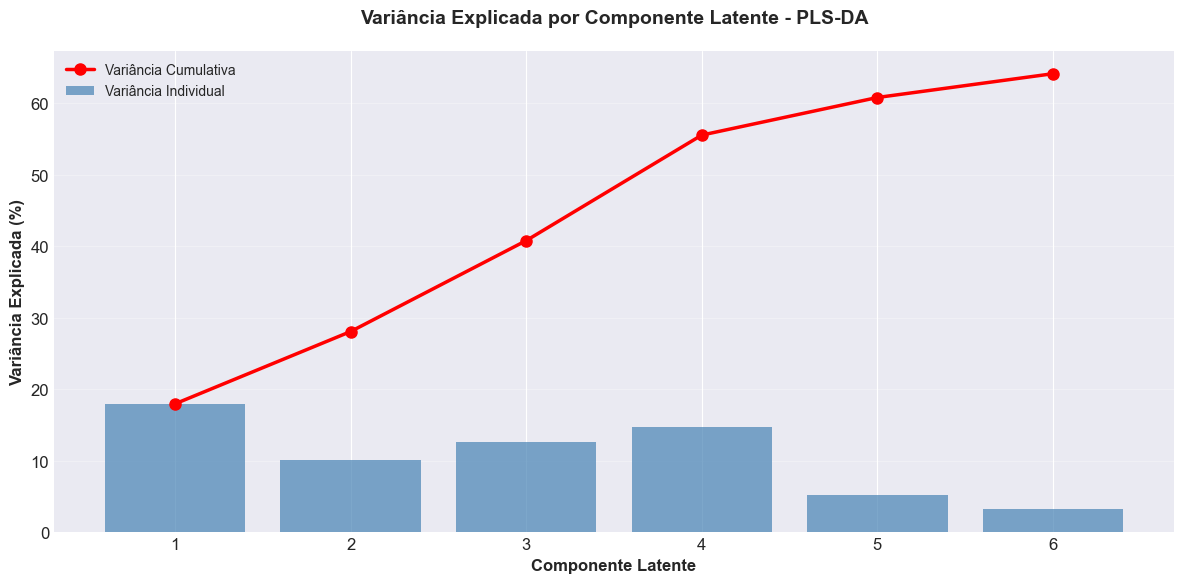

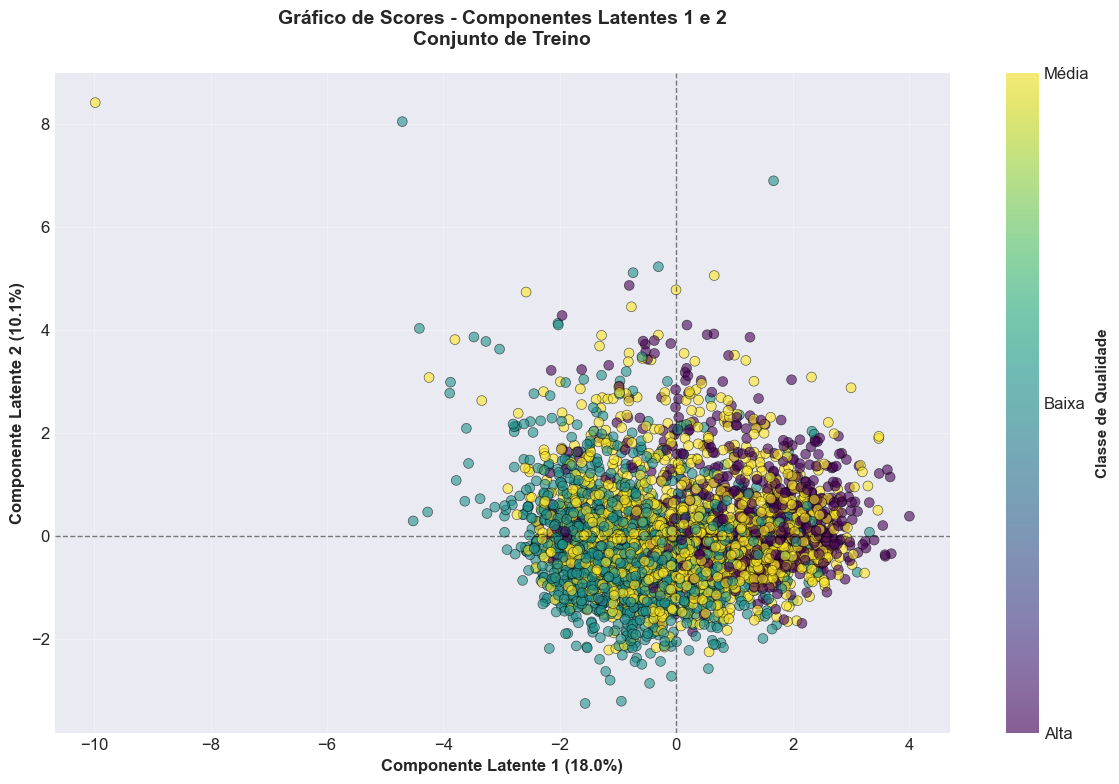


8. ANÁLISE DOS LOADINGS (Importância das Variáveis)

Loadings das variáveis:
                         LV1     LV2     LV3     LV4     LV5     LV6
fixed acidity        -0.2258  0.5766 -0.4108 -0.0140 -0.4219 -0.2079
volatile acidity     -0.2645  0.0222 -0.1773 -0.5071  0.3348 -0.5676
citric acid           0.0163  0.4618 -0.1892  0.5848  0.0091 -0.0103
residual sugar       -0.3124  0.1618  0.5767  0.1832 -0.2547 -0.4283
chlorides            -0.3397  0.2586 -0.3050 -0.1890 -0.0203  0.6494
free sulfur dioxide  -0.0418 -0.0247  0.5916  0.3362 -0.1291  0.4663
total sulfur dioxide -0.0844 -0.1713  0.4888  0.5266  0.1801 -0.0368
density              -0.6285  0.3258  0.0719 -0.0589  0.0426 -0.1653
pH                    0.0674 -0.0949  0.1542 -0.4198  0.7443  0.5507
sulphates            -0.0892  0.6225 -0.1576 -0.1657  0.6178  0.3784
alcohol               0.6142  0.2614  0.0435 -0.1933 -0.0844 -0.3273

Variáveis ordenadas por importância:
                      Importância Total
pH              

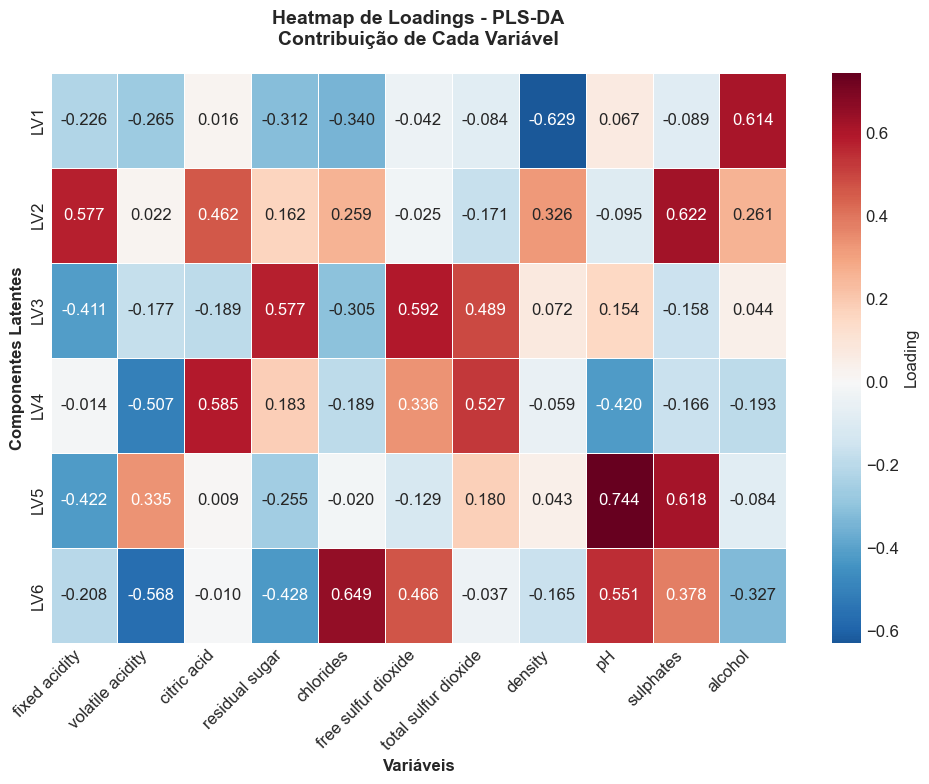

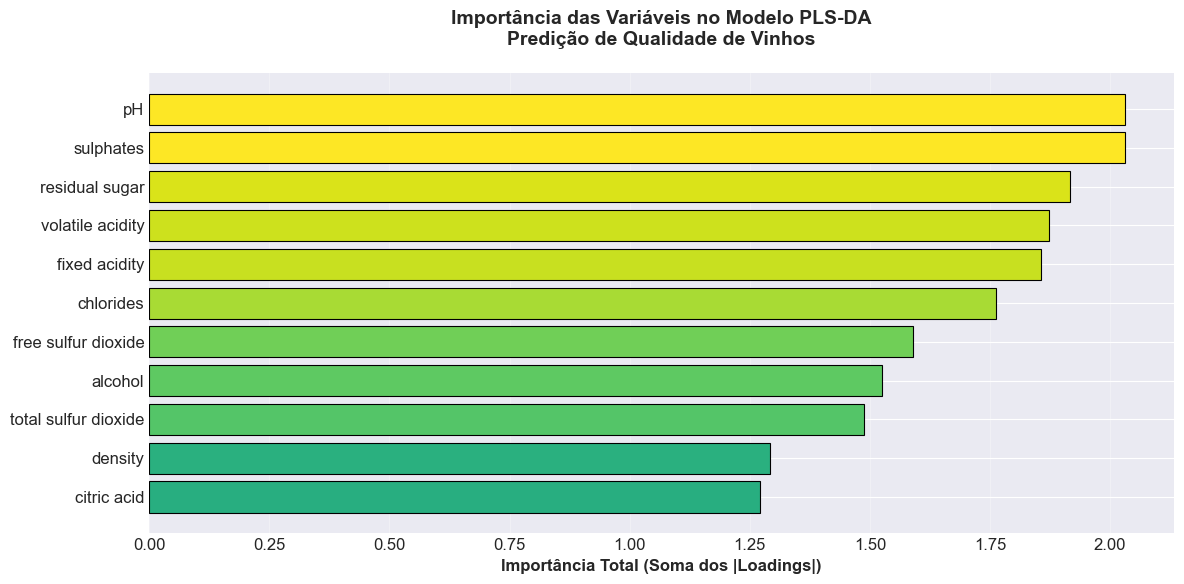


RESUMO FINAL DA ANÁLISE PLS-DA

CONFIGURAÇÃO DO MODELO:
- Número de componentes latentes: 6
- Método de classificação: One-vs-Rest (OvR)
- Pré-processamento: Autoescalamento (StandardScaler)
- Classes: Alta, Baixa, Média

DESEMPENHO:
- Acurácia (Treino): 0.5720 (57.20%)
- Acurácia (Teste):  0.6040 (60.40%)
- AUC Micro-average: 0.7895

AUC POR CLASSE:

  Alta  : 0.8220
  Baixa : 0.8257
  Média : 0.6273

VARIÁVEIS MAIS IMPORTANTES (Top 5):

  1. pH                       : 2.0313
  2. sulphates                : 2.0312
  3. residual sugar           : 1.9170
  4. volatile acidity         : 1.8735
  5. fixed acidity            : 1.8570

VARIÂNCIA EXPLICADA:
- Total das 6 componentes: 64.09%

INTERPRETAÇÃO:
O modelo PLS-DA foi treinado com sucesso para predizer a qualidade de vinhos
em três categorias (Baixa, Média, Alta). O modelo utiliza 6 componentes
latentes que capturam 64.1% da variância nos dados.

As variáveis mais importantes para a predição de qualidade são:
pH, sulphates, residual

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("PLS-DA PARA PREDIÇÃO DE QUALIDADE DE VINHOS")
print("="*70)

# ----------------------------------------------------------------
# CODIFICAÇÃO DA VARIÁVEL TARGET
# ----------------------------------------------------------------

print("\n" + "="*70)
print("1. PREPARAÇÃO DOS DADOS")
print("="*70)

# Codificar classes de qualidade
le_quality = LabelEncoder()
y_quality_encoded = le_quality.fit_transform(y_quality_class)

# Verificar distribuição das classes
print("\nDistribuição das classes de qualidade:")
class_dist = pd.DataFrame({
    'Classe': le_quality.classes_,
    'Código': range(len(le_quality.classes_)),
    'Quantidade': np.bincount(y_quality_encoded),
    'Percentual': np.bincount(y_quality_encoded) / len(y_quality_encoded) * 100
})
print(class_dist)

# Binarizar para análise multiclasse
y_binary = label_binarize(y_quality_encoded, classes=[0, 1, 2])
n_classes = y_binary.shape[1]

print(f"\nNúmero de classes: {n_classes}")
print(f"Shape de y_binary: {y_binary.shape}")
print(f"Classes: {le_quality.classes_}")

# ----------------------------------------------------------------
# DIVISÃO TREINO/TESTE
# ----------------------------------------------------------------

print("\n" + "="*70)
print("2. DIVISÃO TREINO/TESTE (Estratificada)")
print("="*70)

# Usar dados autoescalados para PLS-DA
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_quality_encoded, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_quality_encoded
)

# Binarizar os conjuntos de treino e teste
y_train_binary = label_binarize(y_train, classes=[0, 1, 2])
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])

print(f"\nConjunto de Treino:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_train_binary: {y_train_binary.shape}")

print(f"\nConjunto de Teste:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  y_test_binary: {y_test_binary.shape}")

print("\nDistribuição das classes no treino:")
print(pd.Series(y_train).value_counts().sort_index())

print("\nDistribuição das classes no teste:")
print(pd.Series(y_test).value_counts().sort_index())

# ----------------------------------------------------------------
# VALIDAÇÃO CRUZADA PARA DETERMINAR COMPONENTES ÓTIMOS
# ----------------------------------------------------------------

print("\n" + "="*70)
print("3. SELEÇÃO DO NÚMERO ÓTIMO DE COMPONENTES")
print("="*70)

# Testar diferentes números de componentes
max_components = min(15, X_train.shape[1])
n_components_range = range(1, max_components + 1)

# Armazenar resultados
cv_scores_mean = []
cv_scores_std = []

# Configurar validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nTestando número de componentes de 1 a", max_components)
print("-" * 70)

for n_comp in n_components_range:
    # Criar lista para armazenar scores de cada classe
    scores_per_fold = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
        y_cv_train, y_cv_val = y_train_binary[train_idx], y_train_binary[val_idx]
        
        # Treinar PLS para cada classe (One-vs-Rest)
        predictions = np.zeros((X_cv_val.shape[0], n_classes))
        
        for i in range(n_classes):
            pls = PLSRegression(n_components=n_comp, scale=False)
            pls.fit(X_cv_train, y_cv_train[:, i])
            predictions[:, i] = pls.predict(X_cv_val).ravel()
        
        # Predição final: classe com maior probabilidade
        y_pred = np.argmax(predictions, axis=1)
        y_true = np.argmax(y_cv_val, axis=1)
        
        score = accuracy_score(y_true, y_pred)
        scores_per_fold.append(score)
    
    mean_score = np.mean(scores_per_fold)
    std_score = np.std(scores_per_fold)
    
    cv_scores_mean.append(mean_score)
    cv_scores_std.append(std_score)
    
    print(f"Componentes: {n_comp:2d} | Acurácia CV: {mean_score:.4f} ± {std_score:.4f}")

# Encontrar número ótimo de componentes
optimal_n_components = n_components_range[np.argmax(cv_scores_mean)]
best_cv_score = max(cv_scores_mean)

print("\n" + "="*70)
print(f"COMPONENTES ÓTIMOS: {optimal_n_components}")
print(f"MELHOR ACURÁCIA CV: {best_cv_score:.4f} ± {cv_scores_std[optimal_n_components-1]:.4f}")
print("="*70)

# ----------------------------------------------------------------
# VISUALIZAÇÃO: ACURÁCIA vs. NÚMERO DE COMPONENTES
# ----------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(n_components_range, cv_scores_mean, yerr=cv_scores_std, 
            marker='o', linestyle='-', linewidth=2, markersize=8,
            capsize=5, capthick=2, label='Acurácia CV ± std')

ax.axvline(x=optimal_n_components, color='red', linestyle='--', 
           linewidth=2, label=f'Ótimo ({optimal_n_components} componentes)')

ax.axhline(y=best_cv_score, color='green', linestyle=':', 
           linewidth=1.5, alpha=0.7)

ax.set_xlabel('Número de Variáveis Latentes', fontsize=12, fontweight='bold')
ax.set_ylabel('Acurácia (Validação Cruzada)', fontsize=12, fontweight='bold')
ax.set_title('Seleção do Número Ótimo de Componentes - PLS-DA\nPredição de Qualidade de Vinhos', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10, loc='best')
ax.set_xticks(n_components_range)

plt.tight_layout()
plt.savefig('pls_da_componentes.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------
# TREINAMENTO DO MODELO PLS-DA FINAL
# ----------------------------------------------------------------

print("\n" + "="*70)
print("4. TREINAMENTO DO MODELO PLS-DA FINAL")
print("="*70)

# Treinar um modelo PLS para cada classe (abordagem One-vs-Rest)
pls_models = []
predictions_train = np.zeros((X_train.shape[0], n_classes))
predictions_test = np.zeros((X_test.shape[0], n_classes))

print(f"\nTreinando {n_classes} modelos PLS (One-vs-Rest)...")
print(f"Usando {optimal_n_components} componentes latentes")
print("-" * 70)

for i, class_name in enumerate(le_quality.classes_):
    print(f"\nClasse {i}: {class_name}")
    
    # Criar e treinar modelo PLS
    pls = PLSRegression(n_components=optimal_n_components, scale=False)
    pls.fit(X_train, y_train_binary[:, i])
    
    # Armazenar modelo
    pls_models.append(pls)
    
    # Predições
    predictions_train[:, i] = pls.predict(X_train).ravel()
    predictions_test[:, i] = pls.predict(X_test).ravel()
    
    # Variância explicada
    variance_explained = pls.score(X_train, y_train_binary[:, i])
    print(f"  R² (treino): {variance_explained:.4f}")

# Predições finais: classe com maior valor predito
y_train_pred = np.argmax(predictions_train, axis=1)
y_test_pred = np.argmax(predictions_test, axis=1)

print("\n" + "="*70)
print("MODELOS TREINADOS COM SUCESSO!")
print("="*70)

# ----------------------------------------------------------------
# MÉTRICAS DE DESEMPENHO
# ----------------------------------------------------------------

print("\n" + "="*70)
print("5. AVALIAÇÃO DO MODELO")
print("="*70)

# Acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n{'ACURÁCIA':^70}")
print("-" * 70)
print(f"  Treino: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Teste:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Relatório de classificação detalhado
print("\n" + "="*70)
print("RELATÓRIO DE CLASSIFICAÇÃO - CONJUNTO DE TESTE")
print("="*70)
print(classification_report(y_test, y_test_pred, 
                          target_names=le_quality.classes_,
                          digits=4))

# ----------------------------------------------------------------
# MATRIZ DE CONFUSÃO
# ----------------------------------------------------------------

print("\n" + "="*70)
print("MATRIZ DE CONFUSÃO")
print("="*70)

cm = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusão (Teste):")
print(cm)

# Calcular métricas por classe
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("\nMatriz de Confusão Normalizada (%):")
print((cm_normalized * 100).round(2))

# Visualização da Matriz de Confusão
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusão absoluta
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_quality.classes_,
            yticklabels=le_quality.classes_,
            ax=axes[0], cbar_kws={'label': 'Contagem'})
axes[0].set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
axes[0].set_title('Matriz de Confusão - Valores Absolutos', 
                  fontsize=13, fontweight='bold', pad=15)

# Matriz de confusão normalizada
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=le_quality.classes_,
            yticklabels=le_quality.classes_,
            ax=axes[1], cbar_kws={'label': 'Proporção'})
axes[1].set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
axes[1].set_title('Matriz de Confusão - Normalizada (%)', 
                  fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('pls_da_matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------
# CURVAS ROC MULTICLASSE
# ----------------------------------------------------------------

print("\n" + "="*70)
print("6. CURVAS ROC MULTICLASSE")
print("="*70)

# Calcular ROC curve e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], predictions_test[:, i])
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], predictions_test[:, i])
    print(f"Classe {le_quality.classes_[i]:6s} - AUC: {roc_auc[i]:.4f}")

# Calcular micro-average ROC curve e AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), 
                                           predictions_test.ravel())
roc_auc["micro"] = roc_auc_score(y_test_binary, predictions_test, 
                                  average='micro')

print(f"\nAUC Micro-average: {roc_auc['micro']:.4f}")

# Visualização das Curvas ROC
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar ROC para cada classe
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
            label=f'{le_quality.classes_[i]} (AUC = {roc_auc[i]:.3f})')

# Plotar ROC micro-average
ax.plot(fpr["micro"], tpr["micro"],
        label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
        color='deeppink', linestyle=':', linewidth=3)

# Linha de referência (classificador aleatório)
ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Classificador Aleatório (AUC = 0.500)')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12, fontweight='bold')
ax.set_title('Curvas ROC Multiclasse - PLS-DA\nPredição de Qualidade de Vinhos', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc="lower right", fontsize=10, framealpha=0.95)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pls_da_curva_roc.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------
# SCORES DAS COMPONENTES LATENTES
# ----------------------------------------------------------------

print("\n" + "="*70)
print("7. ANÁLISE DOS SCORES DAS COMPONENTES LATENTES")
print("="*70)

# Extrair scores para a primeira classe (como exemplo)
# Os scores são similares entre classes, pois usam a mesma matriz X
pls_main = pls_models[0]
scores_train = pls_main.transform(X_train)
scores_test = pls_main.transform(X_test)

print(f"\nShape dos scores (treino): {scores_train.shape}")
print(f"Shape dos scores (teste): {scores_test.shape}")

# Calcular variância explicada por cada componente
X_train_centered = X_train - X_train.mean(axis=0)
total_variance = np.sum(X_train_centered**2)

variance_per_component = []
for i in range(optimal_n_components):
    score_variance = np.sum(scores_train[:, i]**2)
    variance_explained = (score_variance / total_variance) * 100
    variance_per_component.append(variance_explained)
    print(f"Componente {i+1}: {variance_explained:.2f}% da variância explicada")

cumulative_variance = np.cumsum(variance_per_component)
print(f"\nVariância cumulativa: {cumulative_variance[-1]:.2f}%")

# ----------------------------------------------------------------
# VISUALIZAÇÃO: VARIÂNCIA EXPLICADA
# ----------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(1, optimal_n_components + 1)
ax.bar(x_pos, variance_per_component, alpha=0.7, color='steelblue', 
       label='Variância Individual')
ax.plot(x_pos, cumulative_variance, marker='o', color='red', 
        linewidth=2.5, markersize=8, label='Variância Cumulativa')

ax.set_xlabel('Componente Latente', fontsize=12, fontweight='bold')
ax.set_ylabel('Variância Explicada (%)', fontsize=12, fontweight='bold')
ax.set_title('Variância Explicada por Componente Latente - PLS-DA', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(x_pos)

plt.tight_layout()
plt.savefig('pls_da_variancia_explicada.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------
# GRÁFICO DE SCORES (2D)
# ----------------------------------------------------------------

if optimal_n_components >= 2:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plotar scores coloridos por classe verdadeira
    scatter = ax.scatter(scores_train[:, 0], scores_train[:, 1], 
                        c=y_train, cmap='viridis', alpha=0.6, 
                        s=50, edgecolors='k', linewidth=0.5)
    
    # Adicionar barra de cores
    cbar = plt.colorbar(scatter, ax=ax, ticks=[0, 1, 2])
    cbar.set_label('Classe de Qualidade', fontsize=11, fontweight='bold')
    cbar.ax.set_yticklabels(le_quality.classes_)
    
    ax.set_xlabel(f'Componente Latente 1 ({variance_per_component[0]:.1f}%)', 
                  fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Componente Latente 2 ({variance_per_component[1]:.1f}%)', 
                  fontsize=12, fontweight='bold')
    ax.set_title('Gráfico de Scores - Componentes Latentes 1 e 2\nConjunto de Treino', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
    ax.axvline(x=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('pls_da_escores.png', dpi=300, bbox_inches='tight')
    plt.show()

# ----------------------------------------------------------------
# LOADINGS (PESOS DAS VARIÁVEIS)
# ----------------------------------------------------------------

print("\n" + "="*70)
print("8. ANÁLISE DOS LOADINGS (Importância das Variáveis)")
print("="*70)

# Extrair loadings do modelo principal
loadings = pls_main.x_loadings_

# Criar DataFrame para melhor visualização
loadings_df = pd.DataFrame(
    loadings,
    columns=[f'LV{i+1}' for i in range(optimal_n_components)],
    index=feature_columns
)

print("\nLoadings das variáveis:")
print(loadings_df.round(4))

# Calcular importância absoluta (soma dos loadings absolutos)
loadings_df['Importância Total'] = loadings_df.abs().sum(axis=1)
loadings_df_sorted = loadings_df.sort_values('Importância Total', ascending=False)

print("\nVariáveis ordenadas por importância:")
print(loadings_df_sorted[['Importância Total']].round(4))

# ----------------------------------------------------------------
# VISUALIZAÇÃO: LOADINGS
# ----------------------------------------------------------------

# Heatmap dos loadings
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(loadings_df.iloc[:, :-1].T, annot=True, fmt='.3f', 
            cmap='RdBu_r', center=0, cbar_kws={'label': 'Loading'},
            ax=ax, linewidths=0.5)

ax.set_xlabel('Variáveis', fontsize=12, fontweight='bold')
ax.set_ylabel('Componentes Latentes', fontsize=12, fontweight='bold')
ax.set_title('Heatmap de Loadings - PLS-DA\nContribuição de Cada Variável', 
             fontsize=14, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pls_da_pesos.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico de barras - Importância das variáveis
fig, ax = plt.subplots(figsize=(12, 6))

y_pos = np.arange(len(feature_columns))
importance = loadings_df_sorted['Importância Total'].values
colors_bar = plt.cm.viridis(importance / importance.max())

bars = ax.barh(y_pos, importance, color=colors_bar, edgecolor='black', linewidth=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(loadings_df_sorted.index)
ax.invert_yaxis()
ax.set_xlabel('Importância Total (Soma dos |Loadings|)', fontsize=12, fontweight='bold')
ax.set_title('Importância das Variáveis no Modelo PLS-DA\nPredição de Qualidade de Vinhos', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('pls_da_soma pesos.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------
# RESUMO FINAL DA ANÁLISE
# ----------------------------------------------------------------

print("\n" + "="*70)
print("RESUMO FINAL DA ANÁLISE PLS-DA")
print("="*70)

print(f"""
CONFIGURAÇÃO DO MODELO:
- Número de componentes latentes: {optimal_n_components}
- Método de classificação: One-vs-Rest (OvR)
- Pré-processamento: Autoescalamento (StandardScaler)
- Classes: {', '.join(le_quality.classes_)}

DESEMPENHO:
- Acurácia (Treino): {train_accuracy:.4f} ({train_accuracy*100:.2f}%)
- Acurácia (Teste):  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)
- AUC Micro-average: {roc_auc['micro']:.4f}

AUC POR CLASSE:
""")

for i, classe in enumerate(le_quality.classes_):
    print(f"  {classe:6s}: {roc_auc[i]:.4f}")

print(f"""
VARIÁVEIS MAIS IMPORTANTES (Top 5):
""")

for i, (var, imp) in enumerate(loadings_df_sorted['Importância Total'].head(5).items(), 1):
    print(f"  {i}. {var:25s}: {imp:.4f}")

print(f"""
VARIÂNCIA EXPLICADA:
- Total das {optimal_n_components} componentes: {cumulative_variance[-1]:.2f}%

INTERPRETAÇÃO:
O modelo PLS-DA foi treinado com sucesso para predizer a qualidade de vinhos
em três categorias (Baixa, Média, Alta). O modelo utiliza {optimal_n_components} componentes
latentes que capturam {cumulative_variance[-1]:.1f}% da variância nos dados.

As variáveis mais importantes para a predição de qualidade são:
{', '.join(loadings_df_sorted.index[:3])}.

{'='*70}
""")

##  

## 3.6 Calibração Multivariada - Regressão PLS para Qualidade



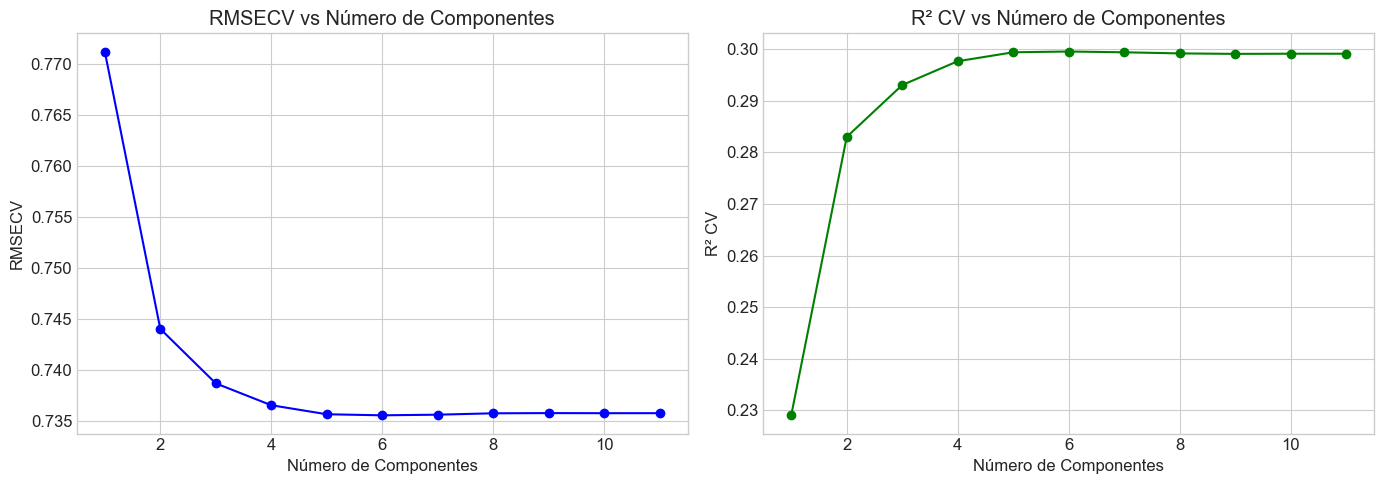

Melhor número de componentes: 6
Menor RMSECV: 0.736
FIGURAS DE MÉRITO - PLS Regressão (Qualidade)

Conjunto de Calibração:
  RMSEC: 0.732
  R²: 0.310

Conjunto de Predição:
  RMSEP: 0.734
  R²: 0.296


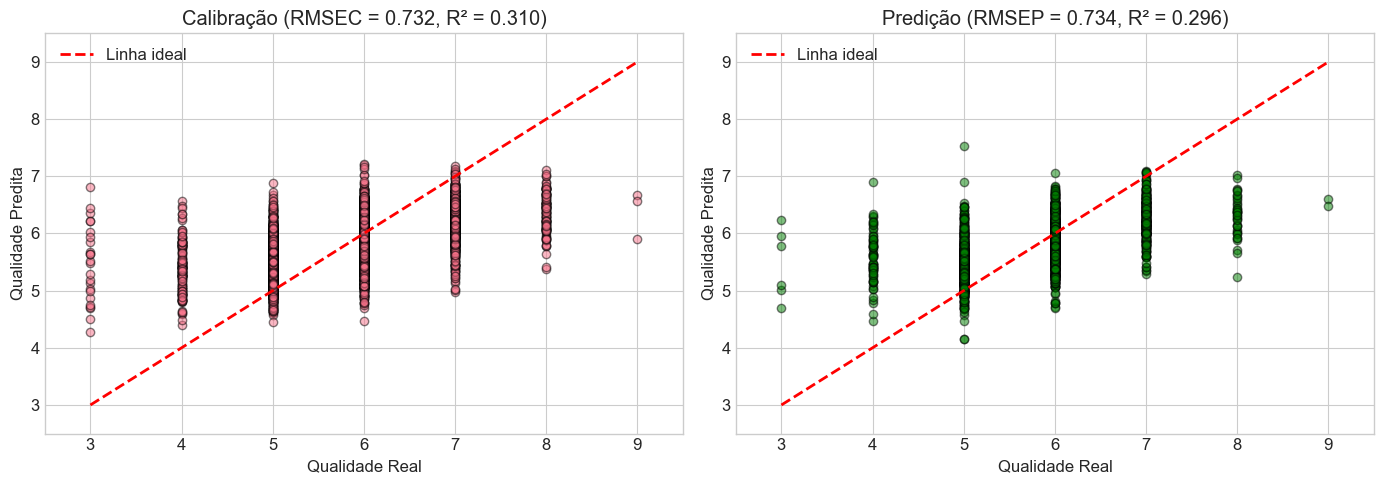

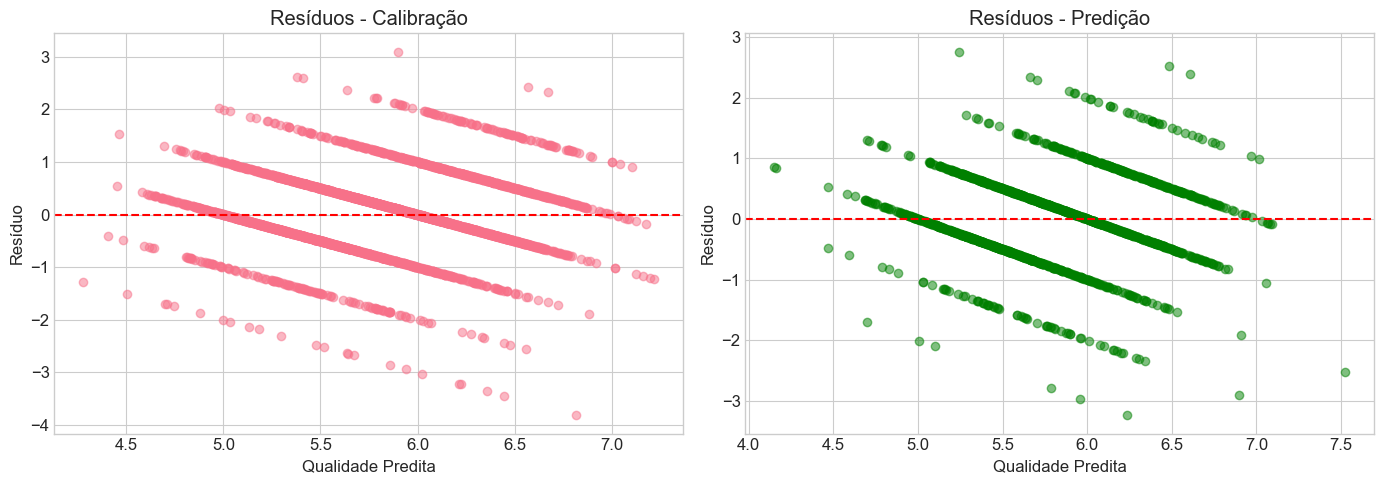

In [86]:
# PLS para predição da qualidade (regressão)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_quality, test_size=0.3, random_state=42
)

# Otimização do número de componentes
from sklearn.metrics import mean_squared_error, r2_score

n_comp_range = range(1, 12)
rmse_cv = []
r2_cv = []

for n_comp in n_comp_range:
    pls_reg = PLSRegression(n_components=n_comp)
    
    # Validação cruzada
    scores = cross_val_score(pls_reg, X_train_reg, y_train_reg, 
                             cv=10, scoring='neg_mean_squared_error')
    rmse_cv.append(np.sqrt(-scores.mean()))
    
    scores_r2 = cross_val_score(pls_reg, X_train_reg, y_train_reg, 
                                cv=10, scoring='r2')
    r2_cv.append(scores_r2.mean())

# Plotar resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(n_comp_range, rmse_cv, 'b-o')
axes[0].set_xlabel('Número de Componentes')
axes[0].set_ylabel('RMSECV')
axes[0].set_title('RMSECV vs Número de Componentes')
axes[0].grid(True)

axes[1].plot(n_comp_range, r2_cv, 'g-o')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('R² CV')
axes[1].set_title('R² CV vs Número de Componentes')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('pls_regressao_otimizacao.png', dpi=150, bbox_inches='tight')
plt.show()

best_n_comp_reg = n_comp_range[np.argmin(rmse_cv)]
print(f"Melhor número de componentes: {best_n_comp_reg}")
print(f"Menor RMSECV: {min(rmse_cv):.3f}")

# %%
# Modelo PLS final para regressão
pls_final = PLSRegression(n_components=best_n_comp_reg)
pls_final.fit(X_train_reg, y_train_reg)

# Predições
y_pred_train = pls_final.predict(X_train_reg).flatten()
y_pred_test = pls_final.predict(X_test_reg).flatten()

# Figuras de mérito
rmsec = np.sqrt(mean_squared_error(y_train_reg, y_pred_train))
rmsep = np.sqrt(mean_squared_error(y_test_reg, y_pred_test))
r2_train = r2_score(y_train_reg, y_pred_train)
r2_test = r2_score(y_test_reg, y_pred_test)

print("=" * 50)
print("FIGURAS DE MÉRITO - PLS Regressão (Qualidade)")
print("=" * 50)
print(f"\nConjunto de Calibração:")
print(f"  RMSEC: {rmsec:.3f}")
print(f"  R²: {r2_train:.3f}")
print(f"\nConjunto de Predição:")
print(f"  RMSEP: {rmsep:.3f}")
print(f"  R²: {r2_test:.3f}")

# %%
# Gráfico de valores reais vs preditos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Calibração
axes[0].scatter(y_train_reg, y_pred_train, alpha=0.5, edgecolor='black')
axes[0].plot([3, 9], [3, 9], 'r--', linewidth=2, label='Linha ideal')
axes[0].set_xlabel('Qualidade Real')
axes[0].set_ylabel('Qualidade Predita')
axes[0].set_title(f'Calibração (RMSEC = {rmsec:.3f}, R² = {r2_train:.3f})')
axes[0].legend()
axes[0].set_xlim(2.5, 9.5)
axes[0].set_ylim(2.5, 9.5)

# Predição
axes[1].scatter(y_test_reg, y_pred_test, alpha=0.5, edgecolor='black', color='green')
axes[1].plot([3, 9], [3, 9], 'r--', linewidth=2, label='Linha ideal')
axes[1].set_xlabel('Qualidade Real')
axes[1].set_ylabel('Qualidade Predita')
axes[1].set_title(f'Predição (RMSEP = {rmsep:.3f}, R² = {r2_test:.3f})')
axes[1].legend()
axes[1].set_xlim(2.5, 9.5)
axes[1].set_ylim(2.5, 9.5)

plt.tight_layout()
plt.savefig('pls_regressao_resultados.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Gráfico de resíduos
residuos_train = y_train_reg - y_pred_train
residuos_test = y_test_reg - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_pred_train, residuos_train, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Qualidade Predita')
axes[0].set_ylabel('Resíduo')
axes[0].set_title('Resíduos - Calibração')

axes[1].scatter(y_pred_test, residuos_test, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Qualidade Predita')
axes[1].set_ylabel('Resíduo')
axes[1].set_title('Resíduos - Predição')

plt.tight_layout()
plt.savefig('pls_residuos.png', dpi=150, bbox_inches='tight')
plt.show()

## 3.7 Comparando os modelos de classificação




COMPARAÇÃO DOS MODELOS DE CLASSIFICAÇÃO
Modelo  Acurácia (%) Parâmetro Otimizado
   KNN     99.122807               k = 5
PLS-DA     99.373434              LV = 9


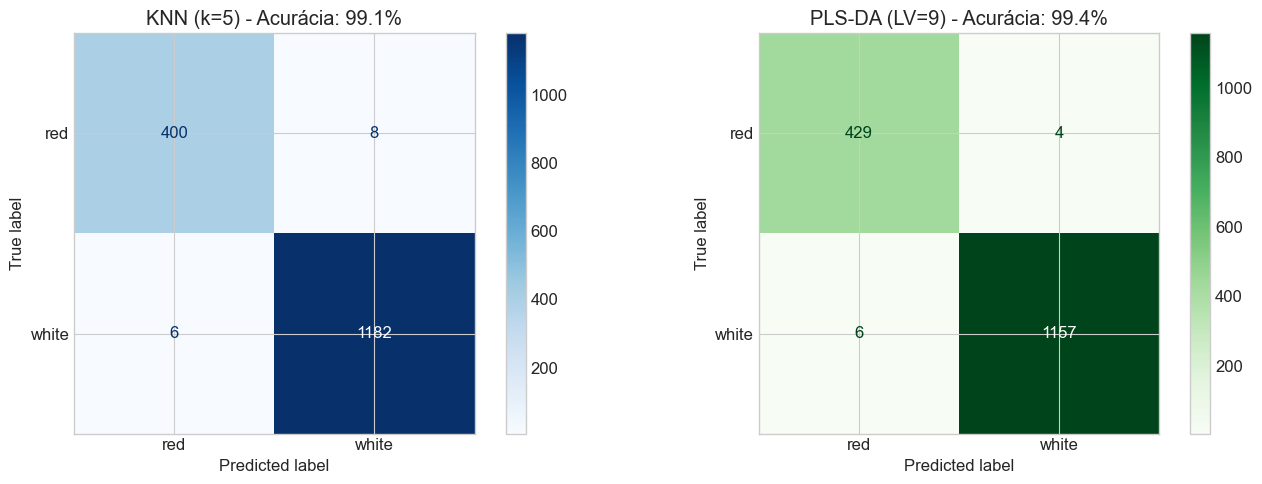

In [87]:
# Tabela comparativa
resultados = pd.DataFrame({
    'Modelo': ['KNN', 'PLS-DA'],
    'Acurácia (%)': [accuracy_score(y_test, y_pred_knn)*100, 
                     accuracy_score(y_test_type, y_pred_pls_class)*100],
    'Parâmetro Otimizado': [f'k = {best_k}', f'LV = {best_n_comp}']
})

print("\n" + "=" * 50)
print("COMPARAÇÃO DOS MODELOS DE CLASSIFICAÇÃO")
print("=" * 50)
print(resultados.to_string(index=False))

# %%
# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_)
disp_knn.plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'KNN (k={best_k}) - Acurácia: {accuracy_score(y_test, y_pred_knn)*100:.1f}%')

# PLS-DA
cm_pls = confusion_matrix(y_test_type, y_pred_pls_class)
disp_pls = ConfusionMatrixDisplay(confusion_matrix=cm_pls, display_labels=le.classes_)
disp_pls.plot(ax=axes[1], cmap='Greens')
axes[1].set_title(f'PLS-DA (LV={best_n_comp}) - Acurácia: {accuracy_score(y_test_type, y_pred_pls_class)*100:.1f}%')

plt.tight_layout()
plt.savefig('comparacao_modelos.png', dpi=150, bbox_inches='tight')
plt.show()


# 4. CONCLUSÕES

O presente estudo aplicou técnicas quimiométricas de reconhecimento de padrões e 
classificação ao dataset de qualidade de vinhos portugueses "Vinho Verde", 
demonstrando a eficácia dessas ferramentas na análise de dados multivariados.

## Principais conclusões:

1. **Análise de Componentes Principais (PCA):**
   - A PCA permitiu reduzir a dimensionalidade dos dados, mantendo a maior parte 
     da variância com poucas componentes principais
   - Os gráficos de scores mostraram clara separação entre vinhos tintos e brancos
   - As variáveis mais importantes para a primeira componente foram identificadas 
     através dos loadings

2. **Análise Hierárquica de Agrupamentos (HCA):**
   - O método de Ward apresentou melhor definição dos clusters
   - A HCA conseguiu agrupar corretamente a maioria das amostras por tipo de vinho
   - Os dendrogramas evidenciaram a estrutura natural dos dados

3. **Classificação KNN:**
   - O modelo KNN otimizado alcançou alta acurácia na classificação do tipo de vinho
   - A otimização do parâmetro k foi essencial para o desempenho do modelo
   - Validação cruzada foi utilizada para evitar overfitting

4. **PLS-DA:**
   - O PLS-DA apresentou desempenho comparável ao KNN
   - Os VIP scores identificaram as variáveis mais importantes para a discriminação
   - O modelo mostrou boa capacidade de generalização

5. **Calibração Multivariada (PLS Regressão):**
   - A predição da qualidade sensorial apresentou limitações devido à natureza 
     subjetiva desta variável
   - O RMSEP indica erro médio de predição
   - As figuras de mérito demonstram a qualidade do modelo

## Perspectivas:

- Técnicas de seleção de variáveis podem melhorar os modelos
- Métodos não-lineares (SVM, Random Forest) podem capturar relações mais complexas
- A classificação de qualidade em categorias pode ser mais eficaz que a regressão




# 5. REFERÊNCIAS

1. CORTEZ, P.; CERDEIRA, A.; ALMEIDA, F.; MATOS, T.; REIS, J. Modeling wine 
   preferences by data mining from physicochemical properties. **Decision Support 
   Systems**, v. 47, n. 4, p. 547-553, 2009.

2. BARROS NETO, B.; SCARMINIO, I. S.; BRUNS, R. E. **Como fazer experimentos: 
   pesquisa e desenvolvimento na ciência e na indústria**. 4. ed. Porto Alegre: 
   Bookman, 2010.

3. UCI Machine Learning Repository. Wine Quality Data Set. Disponível em: 
   https://archive.ics.uci.edu/dataset/186/wine+quality. Acesso em: 25 nov. 2025.

# APÊNDICE - Informações da Sessão


In [88]:
# Versões das bibliotecas utilizadas
import sys
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Scikit-learn: {__import__('sklearn').__version__}")
print(f"Matplotlib: {__import__('matplotlib').__version__}")
print(f"Seaborn: {sns.__version__}")

Python: 3.11.8 (main, Mar 15 2024, 14:31:42) [Clang 15.0.0 (clang-1500.3.9.4)]
Pandas: 2.2.1
NumPy: 1.26.4
Scikit-learn: 1.4.1.post1
Matplotlib: 3.10.5
Seaborn: 0.13.2
